<h1 style="text-align:center;">Fraud Detection in Financial Transactions using Machine Learning</h1>


###
**Problem Statement**: For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike. In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project, we will detect fraudulent credit card transactions with the help of Machine learning models. We will analyze customer-level data that has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group.

**Data Understanding**: The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from 'time' and 'amount', all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

### Table of Contents
*  1. Importing dependencies* * 2. Exploratory data analysi* 
* 3. Splitting the data into train & test da* 
* 4. Model Building
    * Perform cross validation with RepeatedKFold
    * Perform cross validation with StratifiedKFold
    * RandomOverSampler with StratifiedKFold Cross Validation
    * Oversampling with SMOTE Oversampling
    * Oversampling with ADASYN Oversampling
* 5. Hyperparameter Tuning
* 6. Conclusion




In [1]:
import sys

# Add path to virtual environment site-packages directory
sys.path.append("./venv/lib/python3.9/site-packages")


In [2]:
!pip install numpy


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
!pip install scipy

In [7]:
!pip install sklearn

In [8]:
!pip install boost

In [9]:
!pip install xgboost

In [10]:
import sys
print(sys.executable)


/usr/bin/python3


In [11]:
import sys
print(sys.path)


['/usr/lib64/python39.zip', '/usr/lib64/python3.9', '/usr/lib64/python3.9/lib-dynload', '', '/home/hadoop/.local/lib/python3.9/site-packages', '/usr/local/lib64/python3.9/site-packages', '/usr/local/lib/python3.9/site-packages', '/usr/lib64/python3.9/site-packages', '/usr/lib/python3.9/site-packages', './venv/lib/python3.9/site-packages']


In [12]:
# Importing the Libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import boost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Loading the data

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# checking the Shape
df.shape

(284807, 31)

In [15]:
import pandas as pd
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
# checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
#checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
# checking the class distribution of the target variable
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

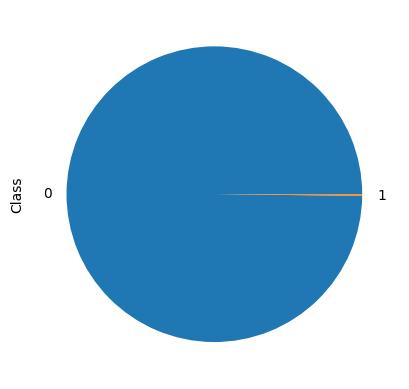

In [19]:
# Checking the class distribution of the target variable in percentage
class_distribution = (df.groupby('Class')['Class'].count() / df['Class'].count()) * 100
print(class_distribution)

# Plotting the class distribution as a pie chart
class_distribution.plot.pie()

In [20]:
# Calculate the number of occurrences for each class
classes = df['Class'].value_counts()

# Calculate the percentage share of normal transactions
normal_share = classes[0] / df['Class'].count() * 100

# Calculate the percentage share of fraudulent transactions
fraud_share = classes[1] / df['Class'].count() * 100

# Print the percentage shares
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


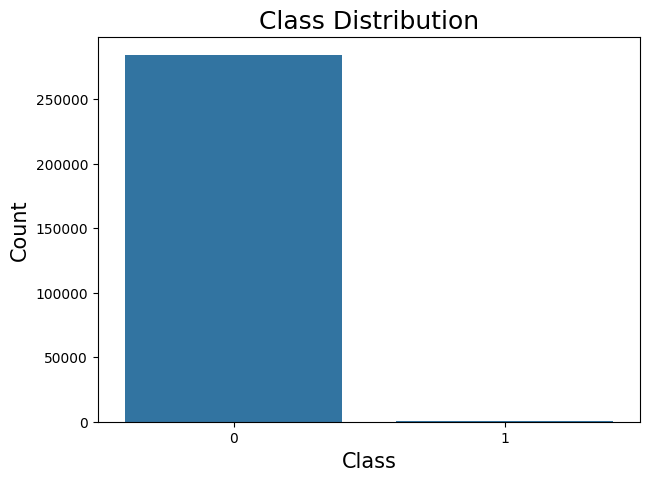

In [21]:
#creating a bar plot for the number and percentage of fradulent vs non-fradulent transcations
# Create a bar plot for the number of occurrences of each class
plt.figure(figsize=(7, 5))

# Use seaborn's countplot to visualize the distribution of classes
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)

# Set title and labels
plt.title("Class Distribution", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Show the plot
plt.show()


In [22]:
# checking the correlation
corr =df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


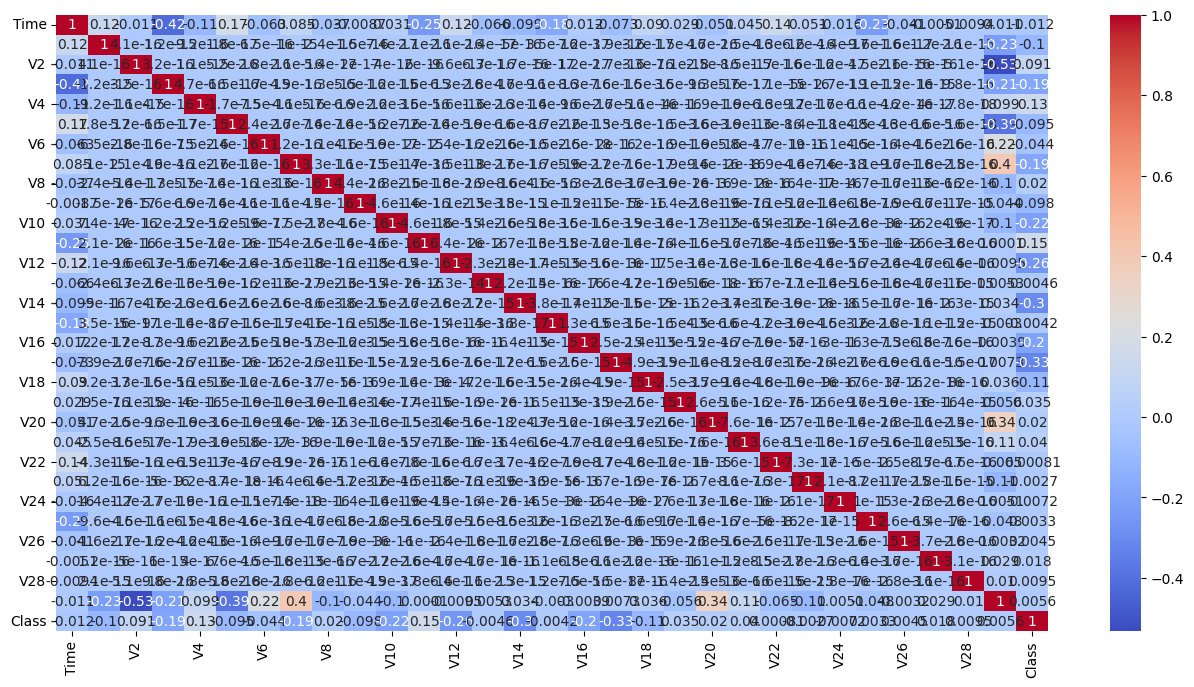

In [23]:
# checking the correlation in heatmap
# plt.figure(figure=(20,20))

sns.heatmap(corr, cmap='coolwarm', annot= True)
plt.gcf().set_size_inches(16,8)

plt.show()


Here we will observe the distribution of our classes

In [24]:
#as time is given in relative fashion, we are using pandas. Timedelta which repersents a duration, the difference between two times as 

Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [25]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)
# we will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time Min'], axis=1, inplace=True)

## Splitting the data into train & test data

In [26]:
#Splitting the dataset into X and Y
y= df['Class']
X=df.drop(['Class'], axis=1)

In [27]:
# chekcing some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
# chekcing some rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [29]:
# Splitting the dataset using train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.20)

Preserving X_test & y_test to evaluate on the test data once the model is build

In [30]:
# checking the spread of data post split
print("y:",np.sum(y))
print("y_train:",np.sum(y_train))
print("y_test:",np.sum(y_test))


y: 492
y_train: 396
y_test: 96


Plotting the distribution of a variable

In [31]:
# Accumulating all the columnn names under one variable

cols =list(X.columns.values)

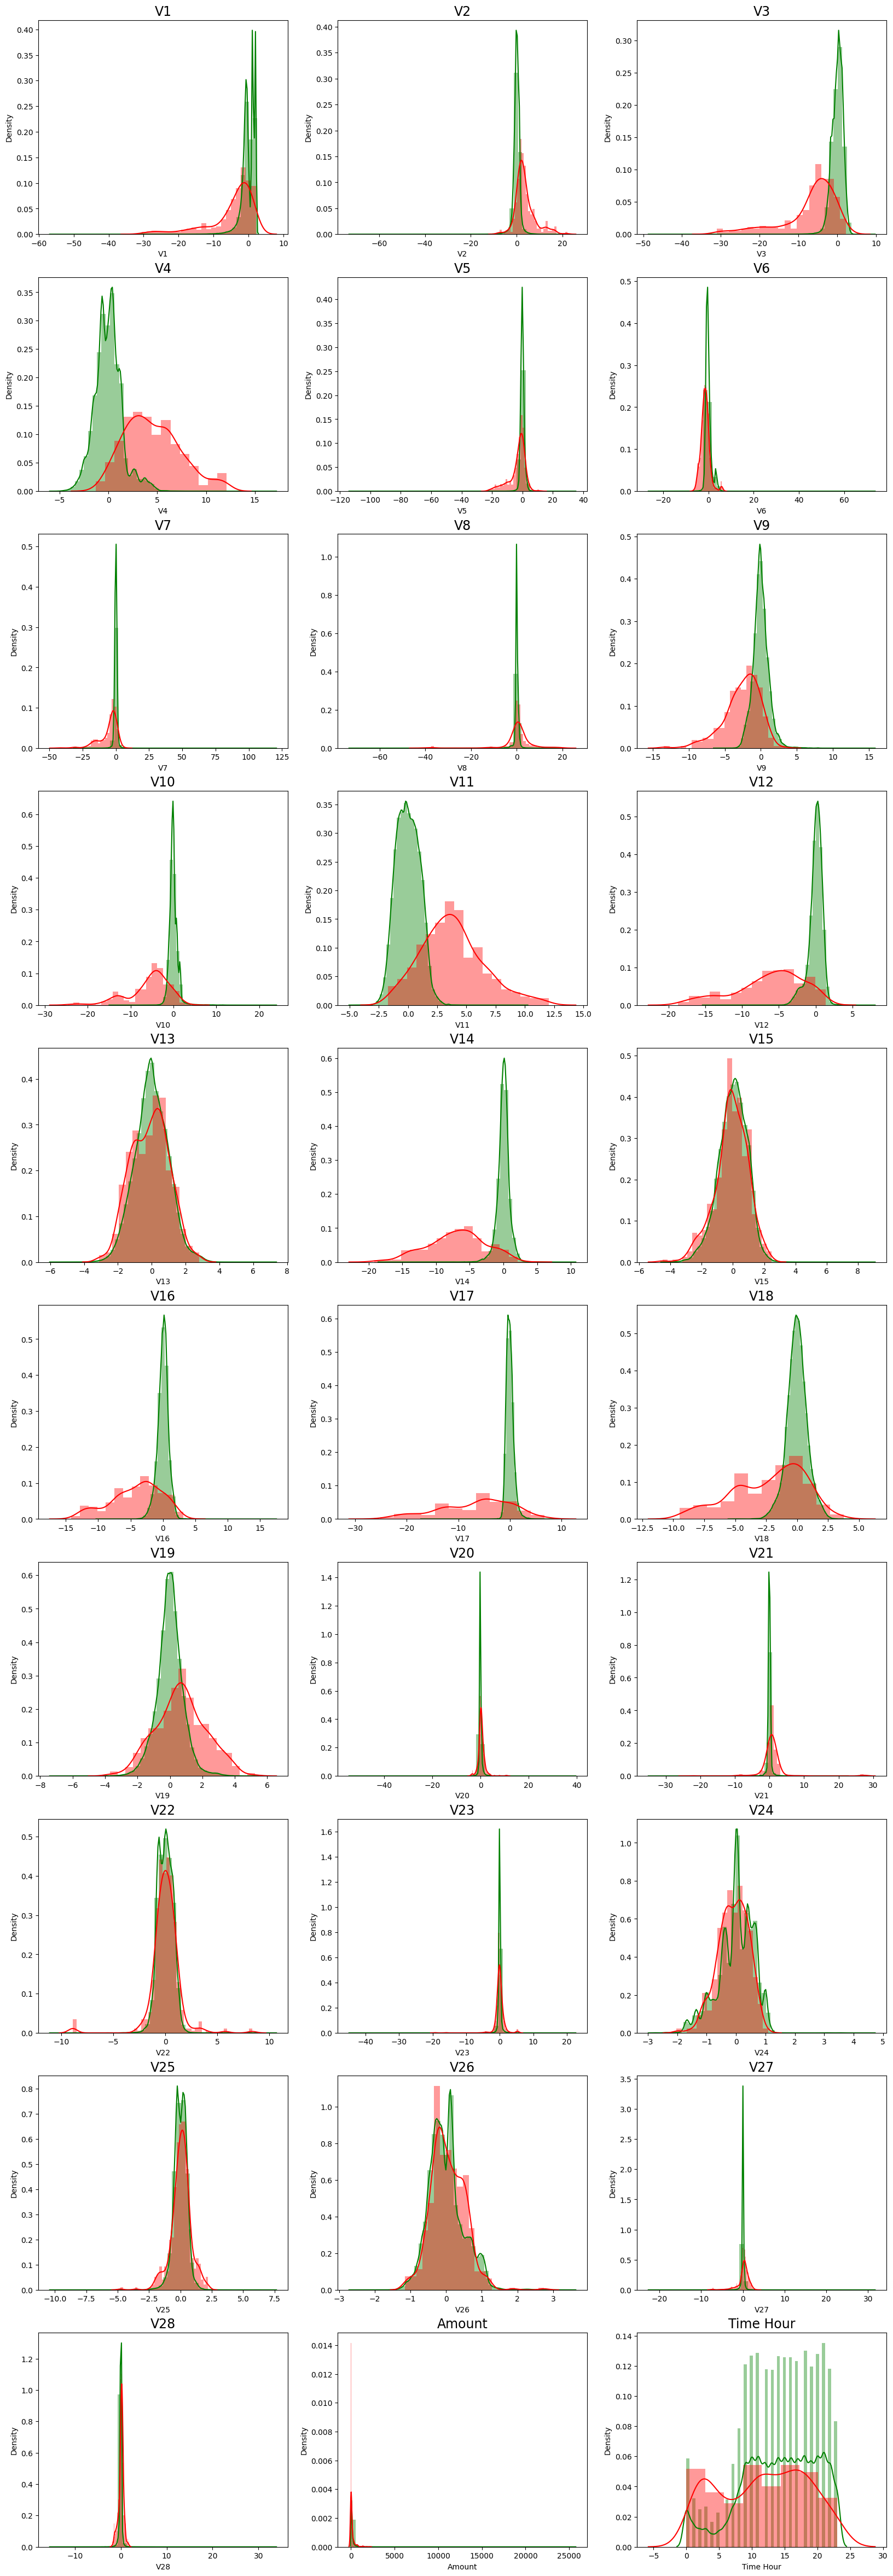

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)
    sns.distplot(X[col][normal_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)

plt.show()

**Confusion Matrix:**

*   1.True Positives: The model correctly predicts positive observations.
*   2.
False Negatives: The model incorrectly predicts negative for positive observations.
*   3.
False Positives: The model incorrectly predicts positive for negative observation
*   4..
True Negatives: The model correctly predicts negative observations.
This matrix helps in understanding the accuracy of a classification model by comparing the predicted values with the actual values.

**Classification Report**

Classification Report in machine learning, which includes the following metrics:


Precision: The number of correctly predicted positive observations divided by the total predicted positives.
Precision=True Positives+False PositivesTrue Positives​


Recall: The number of correctly predicted positive observations divided by all actual positives.
Recall=True Positives+False NegativesTrue Positives​


F1-Score: A harmonic mean of Precision and Recall, providing a combined measure of these two metrics. It is maximum when Precision equals Recall.


This report is crucial for evaluating the performance of a trained classification model. It helps in understanding how well the model is predicting and classifying the data.

 ROC & AUC

 Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) in the context of binary classification problems:
### 
ROCurvr:e: It’s a probability curve that plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values, helping to separate th ‘signl’ from e thnoise
### .
AUC: This is the measure of the ability of a classifier to distinguish between classes. The higher the AUC, the better the model is at distinguishing between positive and negative clas.
s### Te
the ROC curve is an evaluation metric for binary classification problems and that the AUC is used as a summary of the ROCrve.io.

# Model Building



*   Logistic Regression:
It is a popular algorithm under the Supervised Learning technique.
Used for predicting a categorical dependent variable with a set of independent variables.

*   KNN (K-Nearest Neighbour):
A supervised machine learning algorithm.
Solves both classification and regression problems.
‘K’ denotes the number of nearest neighbours to a new unknown variable for prediction or classif


*   Decision TreeClassifier • Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree- structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.  
*   Random Forest • A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex proble
*   XGBoost:
An optimized distributed gradient boosting library.
Known for efficiency, flexibility, and portability.
Implements algorithms under the Gradient Boosting framework.
Offers parallel tree boosting for fast and accurate problem-solv

*   i*   ng.
SVM (Support Vector Mahine):
A supervised learning algorithm for classification or regression.
Mostly used for classification problems.
Plots data items in n-dimensional space based on features.
Classifies by finding the optimal hyper-plane.ms.

ication.

tion.

In [33]:
# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])


In [34]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  """
  This function plots the confusion matrix.

  Args:
      y_test: Ground truth labels
      pred_test: Predicted labels
  """

  cm = confusion_matrix(y_test, pred_test)
  plt.clf()

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  category_names = ['Non-Fraudulent', 'Fraudulent']
  plt.title('Confusion Matrix Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  ticks = np.arange(len(category_names))
  plt.xticks(ticks, category_names, rotation=45)
  plt.yticks(ticks, category_names)

  s = [['TN', 'FP'], ['FN', 'TP']]
  for i in range(2):
    for j in range(2):
      plt.text(j, i, str(s[i][j])+" "+str(cm[i][j]), fontsize=12)

  plt.show()

In [35]:
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score, roc_curve, classification_report
    import matplotlib.pyplot as plt
    
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )
    
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    print('Max auc_roc for L1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for L2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for L1 regularization")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print("Parameters for L2 regularization")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Find predicted values
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Find predicted probabilities
    y_pred_probas_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_probas_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    # Print accuracy, confusion matrix, and classification report for L2 model
    print("Accuracy of Logistic model with L2 regularization: {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    # Print accuracy, confusion matrix, and classification report for L1 model
    print("Accuracy of Logistic model with L1 regularization: {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    # ROC Curve and AUC for L2 model
    l2_roc_value = roc_auc_score(y_test, y_pred_probas_l2)
    print("L2 ROC Value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L2 Threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # ROC Curve and AUC for L1 model
    l1_roc_value = roc_auc_score(y_test, y_pred_probas_l1)
    print("L1 ROC Value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L1 Threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to dataframe
    df_Results = pd.concat([df_Results, pd.DataFrame({
        "Methodology": Methodology,
        'Model': 'Logistic Regression With L2 Regularization',
        'Accuracy': Accuracy_l2,
        'roc_value': l2_roc_value,
        'threshold': threshold
    }, index=[0])], ignore_index=True)
    
    df_Results = pd.concat([df_Results, pd.DataFrame({
        "Methodology": Methodology,
        'Model': 'Logistic Regression With L1 Regularization',
        'Accuracy': Accuracy_l1,
        'roc_value': l1_roc_value,
        'threshold': threshold
    }, index=[0])], ignore_index=True)

    return df_Results


In [36]:
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    
    # Create a KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Model score:", score)

    # Accuracy
    y_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value:", knn_roc_value)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold:", threshold)

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'KNN',
        'Accuracy': score,
        'roc_value': knn_roc_value,
        'threshold': threshold
    }, index=[0])], ignore_index=True)

    return df_Results


In [37]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    # Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']
    scores = {}
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores[c] = test_score
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix:")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset: {:.1%}".format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = pd.concat([df_Results, pd.DataFrame({
            "Methodology": Methodology,
            'Model': 'Tree Model with {0} Criteria'.format(c),
            'Accuracy': test_score,
            'roc_value': tree_roc_value,
            'threshold': threshold
        }, index=[0])], ignore_index=True)

    return df_Results


In [38]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    
    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                      bootstrap=True,
                                      max_features='sqrt',
                                      random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report:")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    rf_roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest roc_value:", rf_roc_value)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest threshold:", threshold)
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
            "Methodology": Methodology,
            'Model': 'Random Forest',
            'Accuracy': RF_test_score,
            'roc_value': rf_roc_value,
            'threshold': threshold
        }, index=[0])], ignore_index=True)
    
    return df_Results


In [39]:

def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_auc_score, roc_curve, classification_report
    import matplotlib.pyplot as plt
    from sklearn import metrics
    import numpy as np
    import pandas as pd

    # Evaluate XGboost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred) 
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
            "Methodology": Methodology,
            'Model': 'XGBoost',
            'Accuracy': XGB_test_score,
            'roc_value': XGB_roc_value,
            'threshold': threshold
        }, index=[0])], ignore_index=True)

    return df_Results


In [40]:
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score,roc_auc_score
    
    
    # Evaluate SVM model with sigmoid kernel
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("accuracy_score: {0}".format(SVM_Score))
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print(confusion_matrix(y_test, y_pred_SVM))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
            "Methodology": Methodology,
            'Model': 'SVM',
            'Accuracy': SVM_Score,
            'roc_value': roc_value,
            'threshold': threshold
        }, index=[0])], ignore_index=True)

    return df_Results


* Build different models on the imbalanced dataset and seeing the result

* Repeated K-fold cross-validation is a robust and preferred technique for evaluating machine learning models, used for both classification and regression tasks. Its core procedure involves shuffling and random sampling of the dataset multiple times, resulting in a more reliable model as it covers a wide range of training and testing operations. This method is an extension of the traditional K-fold cross-validation, with the addition of repetition, further increasing the robustness of the model.

* Stratified K-fold cross-validation is a variation of the K-fold cross-validation technique. In this method, the folds are made by preserving the percentage of samples for each class, ensuring that each fold has a similar distribution of classes. This is particularly useful when dealing with imbalanced datasets, where one class may have significantly more or fewer samples than another. By maintaining a balanced distribution of classes in each fold, Stratified K-fold cross-validation helps improve the performance and reliability of machine learning models, especially for classification tasks.

# perfrom cross validation with RepeatedK-fold

In [41]:
 # Import RepeatedKFold from sklearn.model_selection
from sklearn.model_selection import RepeatedKFold

# Initialize RepeatedKFold with n_splits=5, n_repeats=10, and random_state=None
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# Assume x is the feature set and y is the target
for train_index, test_index in rkf.split(X, y):
    print("TRAIN: ", train_index, "TEST:", test_index)
    
    # Split the data into training and testing sets
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [    10     14     22 ... 284795 284798 284799]
TRAIN:  [     0      2      3 ... 284804 284805 284806] TEST: [     1      9     37 ... 284788 284796 284800]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [     5      7     12 ... 284786 284791 284797]
TRAIN:  [     0      1      5 ... 284800 284802 284805] TEST: [     2      3      4 ... 284803 284804 284806]
TRAIN:  [     1      2      3 ... 284803 284804 284806] TEST: [     0     11     13 ... 284792 284802 284805]
TRAIN:  [     0      2      3 ... 284803 284804 284805] TEST: [     1     12     20 ... 284788 284796 284806]
TRAIN:  [     0      1      3 ... 284802 284805 284806] TEST: [     2      6      8 ... 284800 284803 284804]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [     9     14     15 ... 284797 284801 284802]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [     3      4      5 ... 284783 284789 284798]
TRAIN:  [ 

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.9735733916833974
Max auc_roc for L2: 0.5621022320857229
Parameters for L1 regularization
[[-0.05763964 -0.13306898 -0.17896921  0.06600175 -0.26113863  0.09169728
   0.11953025 -0.03416666 -0.14162477 -0.14403433 -0.03700514  0.01318531
  -0.13663666 -0.22095073  0.01232274 -0.1168888  -0.22233755  0.03291564
   0.01058018  0.23517803  0.09007005 -0.02878983 -0.02695948 -0.00600455
  -0.04318888  0.00669247 -0.06591011 -0.01886646 -0.00658161 -0.11627002]]
[-2.10072341]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.47341266,
        0.47172604, 0.49367541, 0.85477405, 0.91079866, 0.93004441,
        0.8711618 , 0.90020861, 0.93458904, 0.90925476, 0.92034479,
        0.93102281, 0.89244693, 0.92555365, 0.89186438, 0.96178406],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.59521007,
        0.50310459, 0.52008475, 0.87681025, 0.94829155, 0.95551924,
        0.93435974, 0.93677306, 0.948591

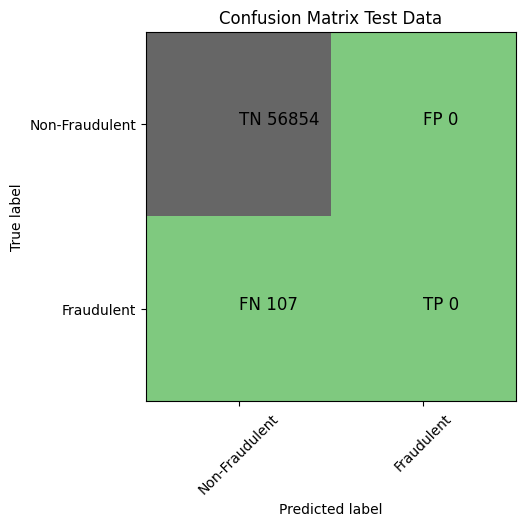

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.00      0.00      0.00       107

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization: 0.998841312476958
Confusion Matrix


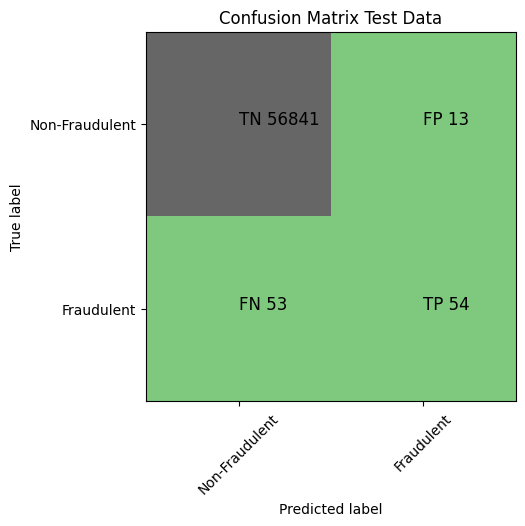

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.81      0.50      0.62       107

    accuracy                           1.00     56961
   macro avg       0.90      0.75      0.81     56961
weighted avg       1.00      1.00      1.00     56961

L2 ROC Value: 0.5826907353118613
L2 Threshold: 0.4993603720969178
ROC for the test dataset: 58.3%


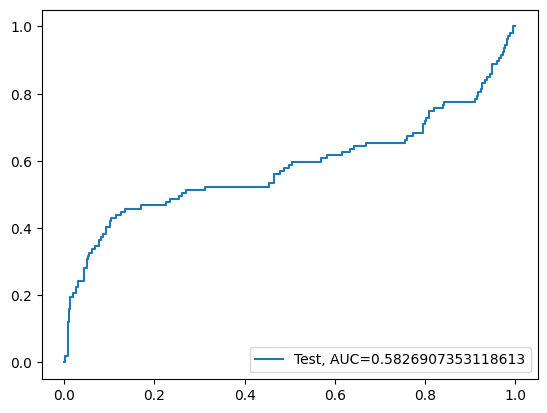

L1 ROC Value: 0.8423065277219334
L1 Threshold: 0.04694818266719136
ROC for the test dataset: 84.2%


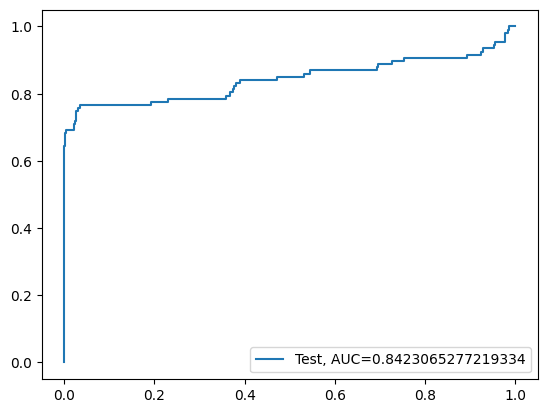

Time Taken by Model: --- 121.85723972320557 seconds ---
------------------------------------------------------------
KNN Model
Model score: 0.9990870946788153
Confusion Matrix:


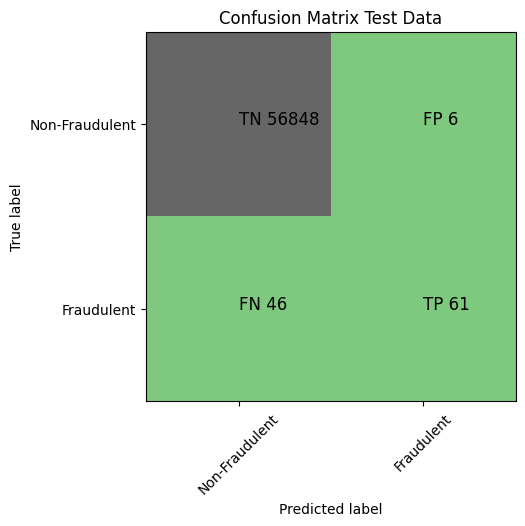

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.91      0.57      0.70       107

    accuracy                           1.00     56961
   macro avg       0.95      0.78      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8502275380553369
KNN threshold: 0.2
ROC for the test dataset: 85.0%


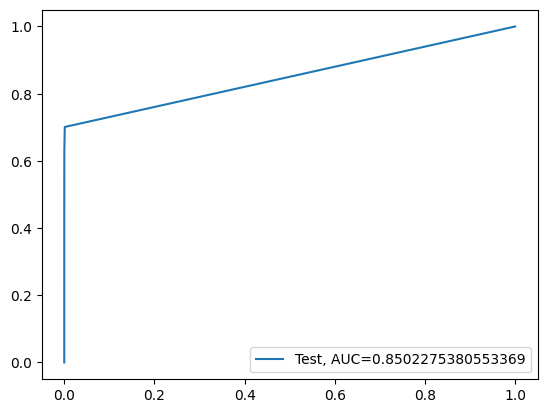

Time Taken by Model: --- 168.09925365447998 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9990344270641316
Confusion Matrix:


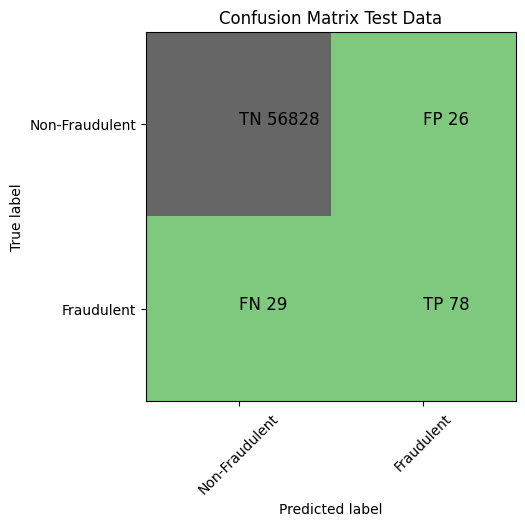

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.75      0.73      0.74       107

    accuracy                           1.00     56961
   macro avg       0.87      0.86      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8642573254530622
Tree threshold: 1.0
ROC for the test dataset: 86.4%


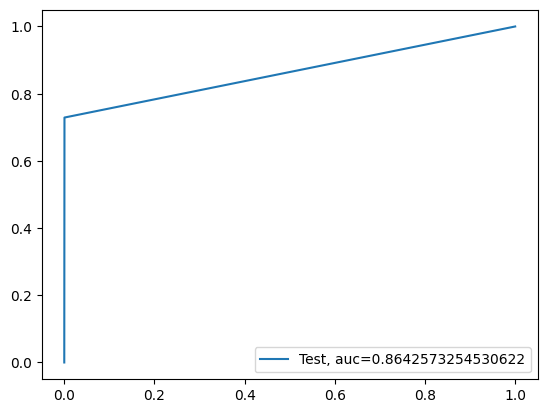

entropy score: 0.9991397622934991
Confusion Matrix:


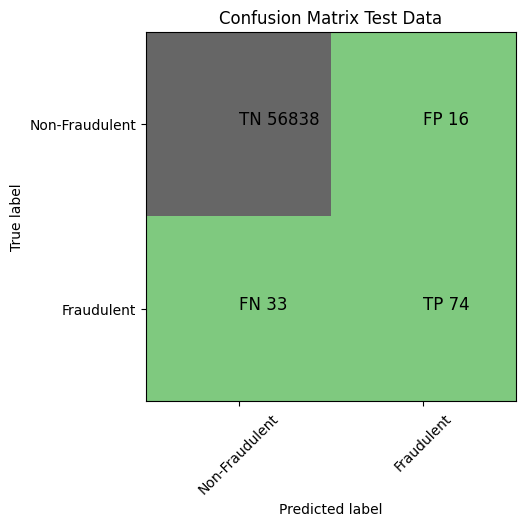

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.69      0.75       107

    accuracy                           1.00     56961
   macro avg       0.91      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8456536812277652
Tree threshold: 1.0
ROC for the test dataset: 84.6%


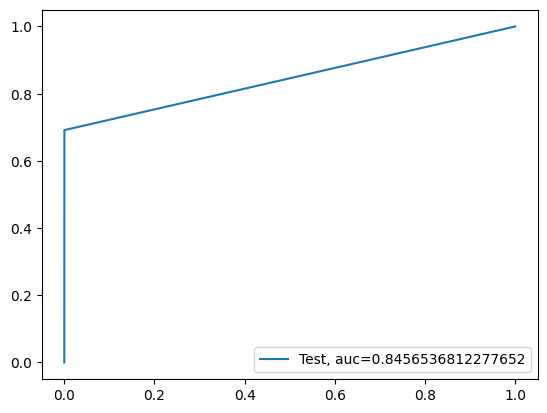

Time Taken by Model: 32.000712633132935 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993328768806727
Confusion Matrix:


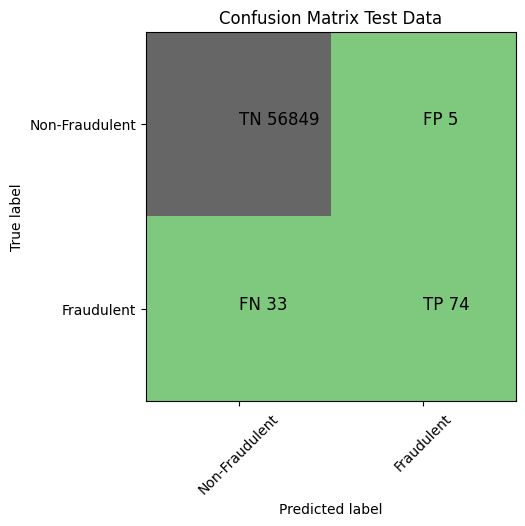

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.94      0.69      0.80       107

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9466349945704509
Random Forest threshold: 0.01
ROC for the test dataset: 94.7%


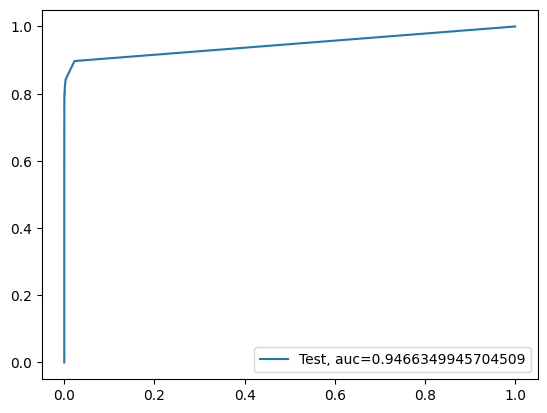

Time Taken by Model: --- 225.6746768951416 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999420656238479
Confusion Matrix:


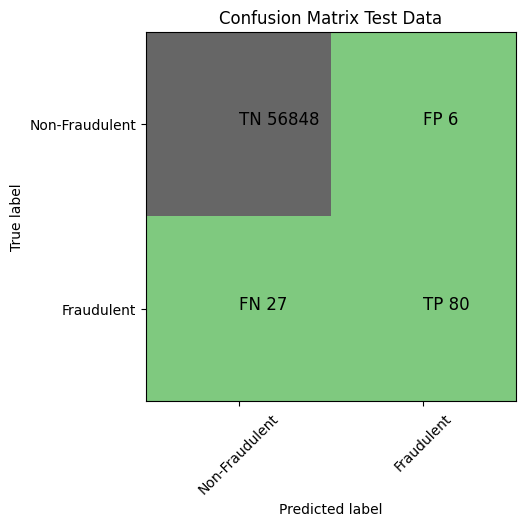

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.93      0.75      0.83       107

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9791028931623187
XGBoost threshold: 7.310724322451279e-05
ROC for the test dataset: 97.9%


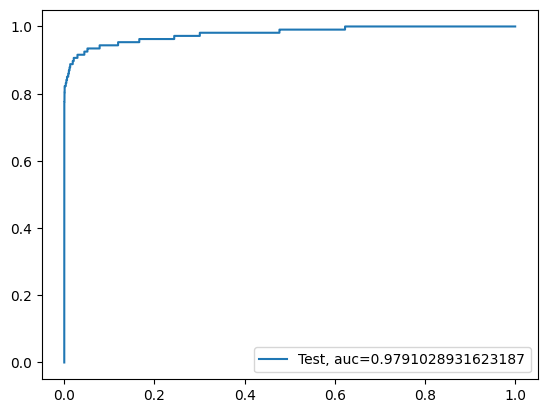

Time Taken by Model: 3.381687879562378 seconds
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.9974895103667422
Confusion Matrix:


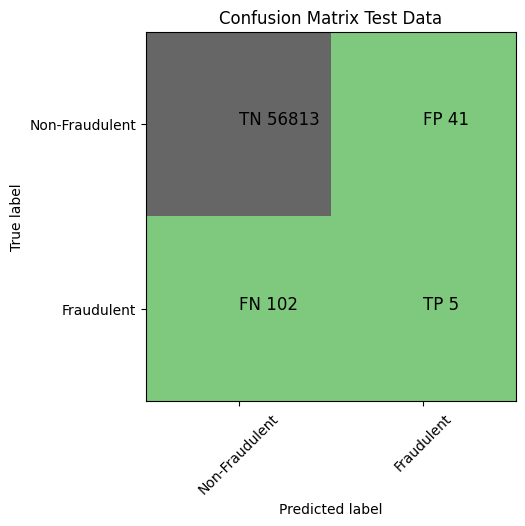

[[56813    41]
 [  102     5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.11      0.05      0.07       107

    accuracy                           1.00     56961
   macro avg       0.55      0.52      0.53     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.7134353643649959
SVM threshold: 0.0017215048016718411
ROC for the test dataset: 71.3%


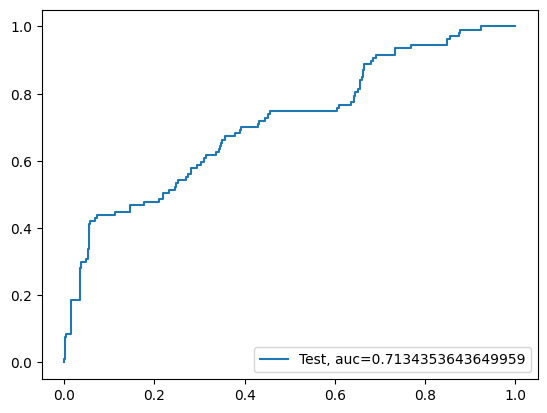

Time Taken by Model: 801.0828940868378 seconds
------------------------------------------------------------


In [42]:
# Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Repeated K Fold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Repeated KFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)


In [43]:
# Remove duplicates based on specific columns
# df_Results.drop(df_Results.index[:], inplace=True)
#

In [44]:
# df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression With L2 Regularization,0.998122,0.582691,0.046948
1,Repeated KFold Cross Validation,Logistic Regression With L1 Regularization,0.998841,0.842307,0.046948
2,Repeated KFold Cross Validation,KNN,0.999087,0.850228,0.200000
3,Repeated KFold Cross Validation,Tree Model with gini Criteria,0.999034,0.864257,1.000000
4,Repeated KFold Cross Validation,Tree Model with entropy Criteria,0.999140,0.845654,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999333,0.946635,0.010000
6,Repeated KFold Cross Validation,XGBoost,0.999421,0.979103,0.000073
7,Repeated KFold Cross Validation,SVM,0.997490,0.713435,0.001722


Results for cross validation with RepeatedKfold: 

Looking at the Accuracy and ROC value we have "Logistic Regression With L2 Regularization" which has provided best results for the cross valdation with Repeated KFold Cross Validation

# perform cross validation with StratifiedKfold:

In [45]:
# Import StratifiedKFold from sklearn.model_selection
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold with n_splits=5, random_state=None
skf = StratifiedKFold(n_splits=5, random_state=None)

# Assume x is the feature set and y is the target
for train_index, test_index in skf.split(X, y):
    print("TRAIN: ", train_index, "TEST:", test_index)
    
    # Split the data into training and testing sets
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN:  [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN:  [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.9652106893977332
Max auc_roc for L2: 0.5597020083683936
Parameters for L1 regularization
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.9448154

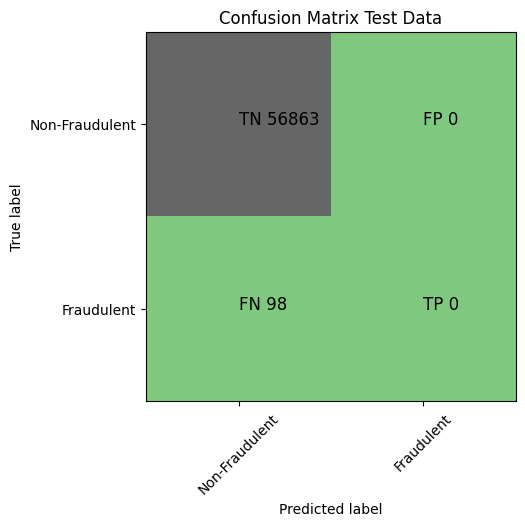

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization: 0.9987535331191517
Confusion Matrix


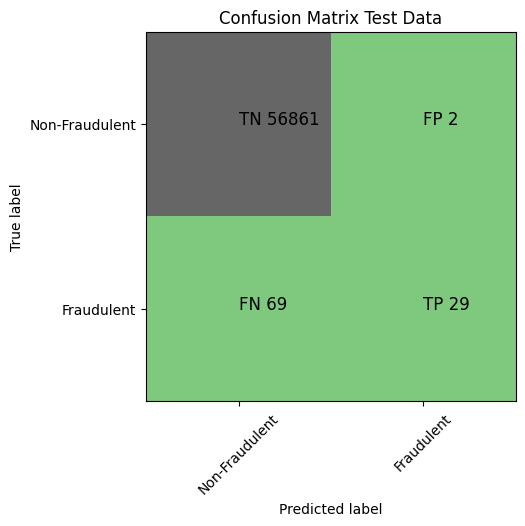

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

L2 ROC Value: 0.6111619154810686
L2 Threshold: 0.4993921957728672
ROC for the test dataset: 61.1%


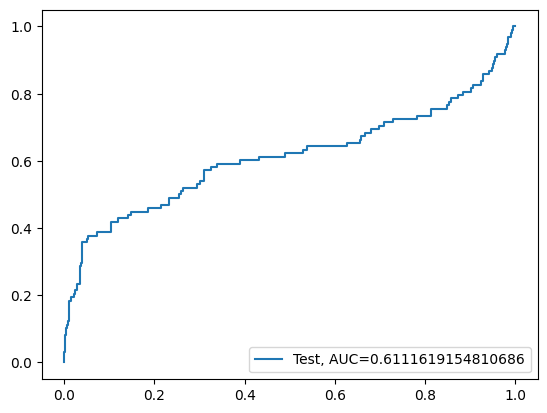

L1 ROC Value: 0.8890758561483437
L1 Threshold: 0.021087492766199863
ROC for the test dataset: 88.9%


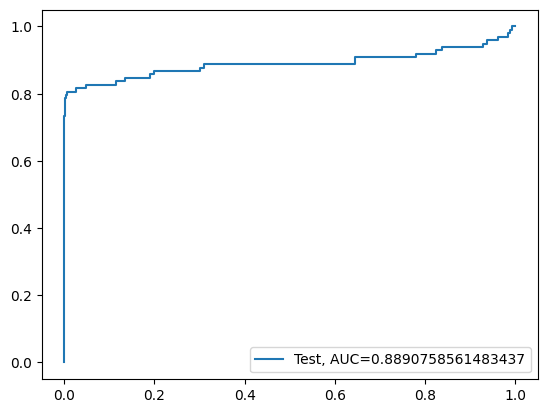

Time Taken by Model: --- 122.25047636032104 seconds ---
------------------------------------------------------------
KNN Model
Model score: 0.9991924299081828
Confusion Matrix:


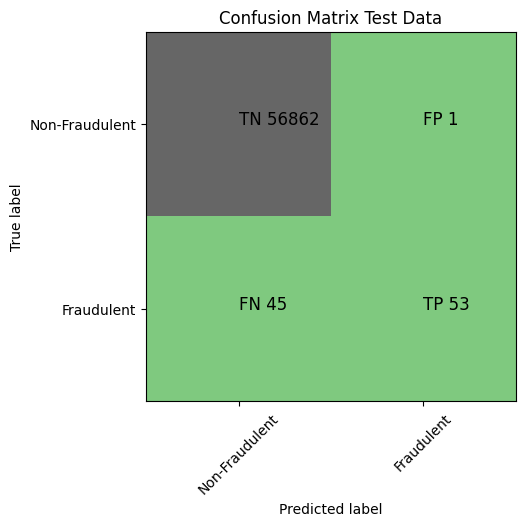

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset: 80.6%


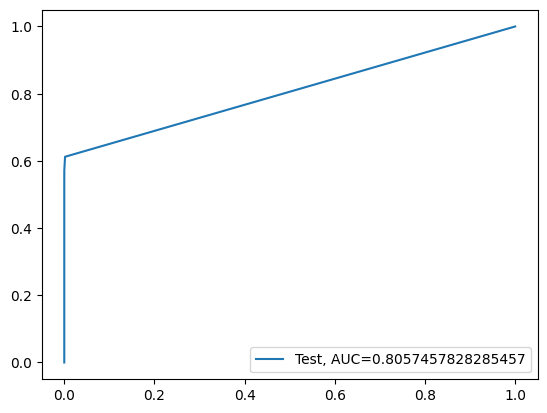

Time Taken by Model: --- 160.8762309551239 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix:


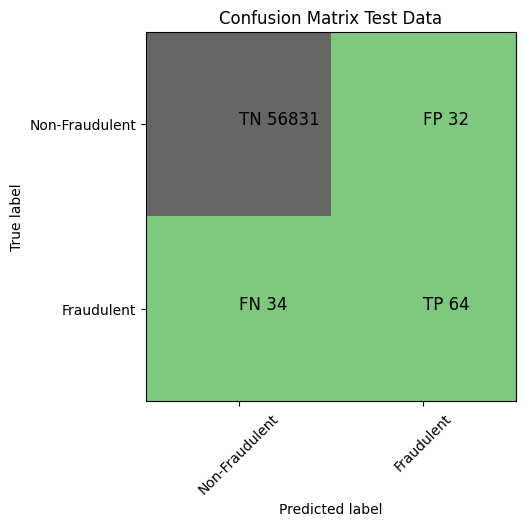

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset: 82.6%


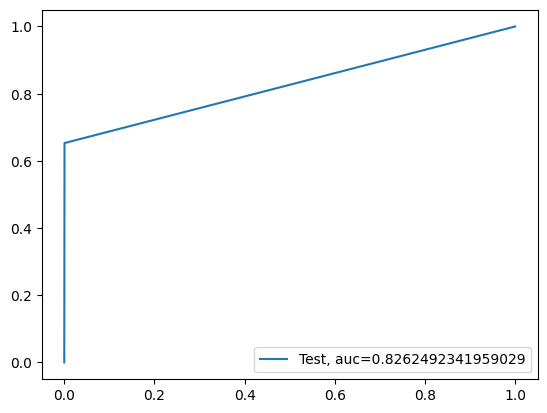

entropy score: 0.9990168711925703
Confusion Matrix:


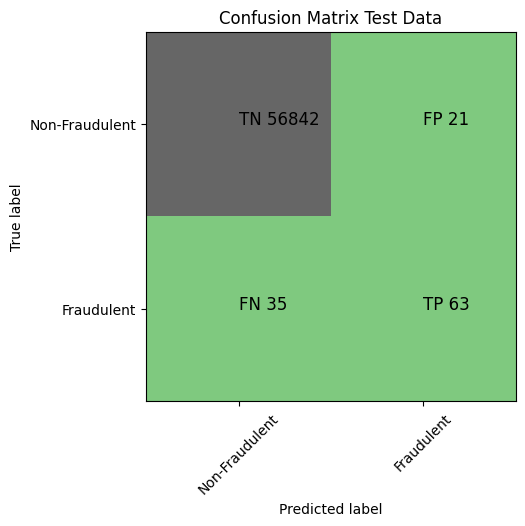

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset: 82.1%


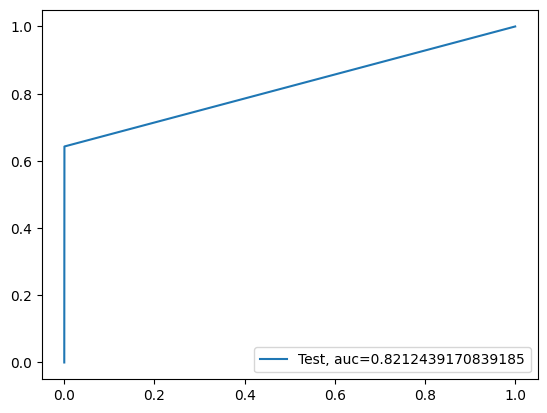

Time Taken by Model: 35.55968761444092 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix:


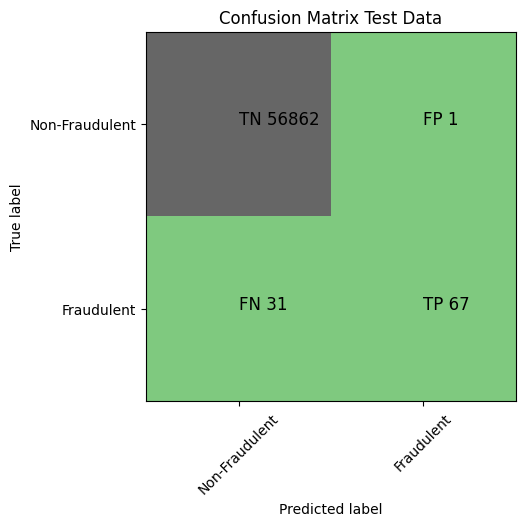

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset: 94.6%


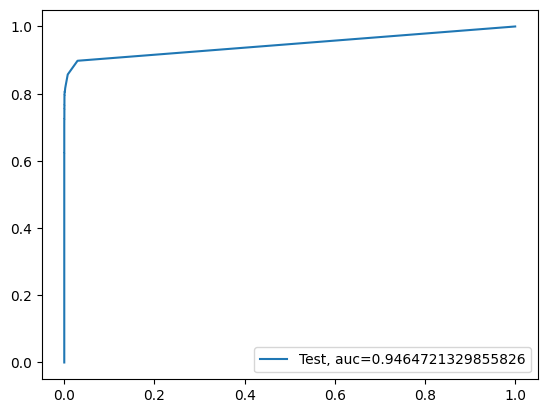

Time Taken by Model: --- 224.94553446769714 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix:


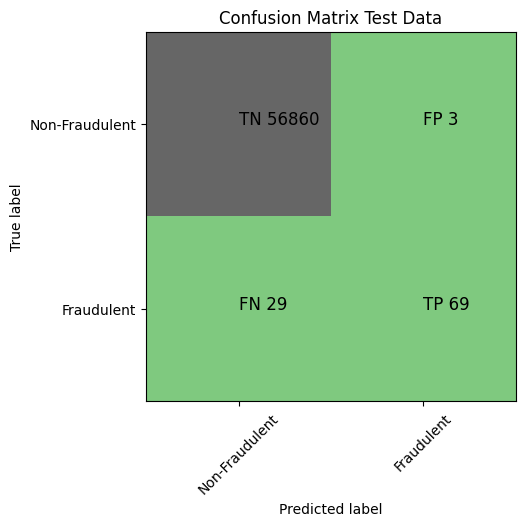

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset: 97.2%


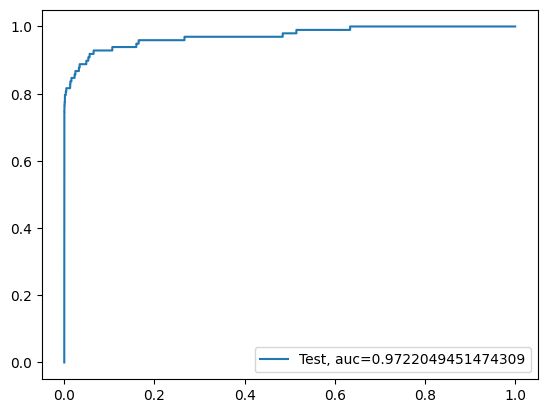

Time Taken by Model: 3.3069262504577637 seconds
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score: 0.9982795245869981
Confusion Matrix:


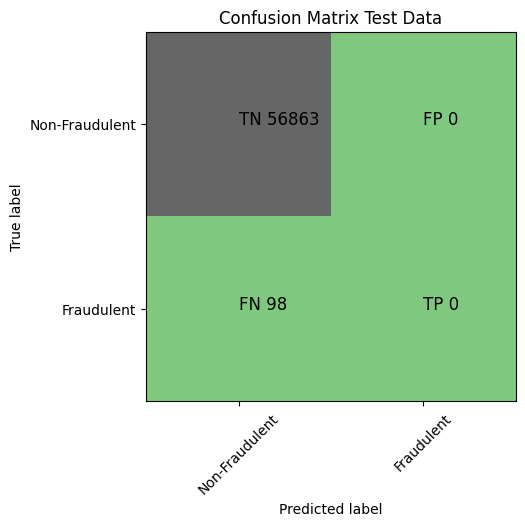

[[56863     0]
 [   98     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0027774522009455156
ROC for the test dataset: 40.2%


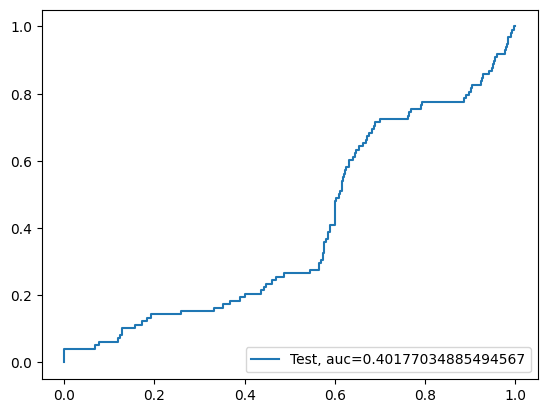

Time Taken by Model: 613.4659011363983 seconds
------------------------------------------------------------


In [46]:
# Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)


In [47]:
# Remove duplicates based on specific columns
df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results


,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression With L2 Regularization,0.998122,0.582691,0.046948
1,Repeated KFold Cross Validation,Logistic Regression With L1 Regularization,0.998841,0.842307,0.046948
2,Repeated KFold Cross Validation,KNN,0.999087,0.850228,0.200000
3,Repeated KFold Cross Validation,Tree Model with gini Criteria,0.999034,0.864257,1.000000
4,Repeated KFold Cross Validation,Tree Model with entropy Criteria,0.999140,0.845654,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999333,0.946635,0.010000
6,Repeated KFold Cross Validation,XGBoost,0.999421,0.979103,0.000073
7,Repeated KFold Cross Validation,SVM,0.997490,0.713435,0.001722
8,StratifiedKFold Cross Validation,Logistic Regression With L2 Regularization,0.998280,0.611162,0.021087
9,StratifiedKFold Cross Validation,Logistic Regression With L1 Regularization,0.998754,0.889076,0.021087


#### Results for cross validation with StratifiedKFold:

Looking at the ROC value we have Logistic Regression With L2 Regularization	 has provided best results for the cross validation with StratifiedKFold technique.

### Conclusion:
* As the Results show Logistic Regression With L2 Regularization for StratifiedKFold cross validation provided bet results.

#### Proceed with the model which shows the best result:
* Apply the hyperparameter on the model
* Predict on the test dataset

Max auc_roc for L2: 0.5597020083683936
Parameters for L2 regularization
[[ 3.59840980e-07  2.10530060e-07 -1.58002317e-06 -2.04884044e-07
   3.76472678e-07 -2.67633109e-07  3.13241030e-08 -1.20226136e-08
  -8.98863463e-08 -1.54002314e-07 -4.65334035e-07  1.57441535e-07
  -1.27094538e-07 -4.38050832e-07 -3.73274685e-07 -8.23337714e-08
  -3.16607926e-07  1.01807717e-07  7.54814354e-08 -6.47175864e-08
   7.04219521e-08  1.73013268e-07  7.32726162e-08 -1.03599764e-08
  -2.85545640e-07 -2.03747293e-08  3.38203553e-09 -1.32510707e-08
  -6.82254904e-04 -9.57433590e-05]]
[-7.52178855e-06]
{1: array([[0.48266925, 0.48178322, 0.47951852, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818],
       [0.55602862, 0.55598183, 0.55533056, 0.55524448, 0.55524448,
        0.55524448, 0.55524448, 0.55524448, 0.55524448, 0.55524448,

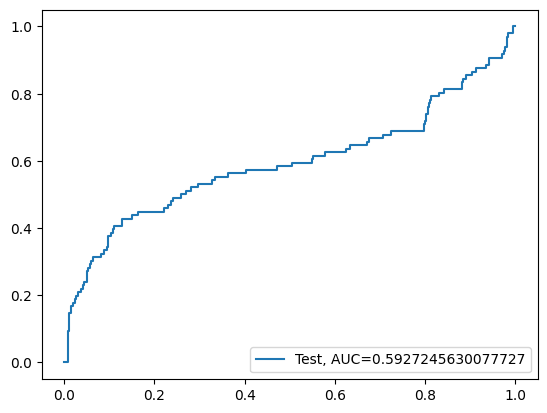

In [57]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print('Max auc_roc for L2:', clf.scores_[1].mean(axis=0).max())

print("Parameters for L2 regularization")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

# Find predicted values
y_pred_l2 = clf.predict(X_test)

# Find predicted probabilities
y_pred_probas_l2 = clf.predict_proba(X_test)[:, 1]

# Accuracy of L2 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

# Print accuracy, confusion matrix, and classification report for L2 model
print("Accuracy of Logistic model with L2 regularization: {0}".format(Accuracy_l2))

# ROC Curve and AUC for L2 model
l2_roc_value = roc_auc_score(y_test, y_pred_probas_l2)
print("L2 ROC Value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas_l2)
threshold = thresholds[np.argmax(tpr - fpr)]
print("L2 Threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset: {:.1%}".format(roc_auc))
plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
plt.legend(loc=4)
plt.show()


In [58]:
# checking for the coefficinet values
clf.coef_

array([[ 3.59840980e-07,  2.10530060e-07, -1.58002317e-06,
        -2.04884044e-07,  3.76472678e-07, -2.67633109e-07,
         3.13241030e-08, -1.20226136e-08, -8.98863463e-08,
        -1.54002314e-07, -4.65334035e-07,  1.57441535e-07,
        -1.27094538e-07, -4.38050832e-07, -3.73274685e-07,
        -8.23337714e-08, -3.16607926e-07,  1.01807717e-07,
         7.54814354e-08, -6.47175864e-08,  7.04219521e-08,
         1.73013268e-07,  7.32726162e-08, -1.03599764e-08,
        -2.85545640e-07, -2.03747293e-08,  3.38203553e-09,
        -1.32510707e-08, -6.82254904e-04, -9.57433590e-05]])

In [59]:
#creating a dataframe with the coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis =1)
coefficients.columns =['Feature','Importance Coefficient']

In [60]:
coefficients

,Feature,Importance Coefficient
0,V1,3.598410e-07
1,V2,2.105301e-07
2,V3,-1.580023e-06
3,V4,-2.048840e-07
4,V5,3.764727e-07
5,V6,-2.676331e-07
6,V7,3.132410e-08
7,V8,-1.202261e-08
8,V9,-8.988635e-08
9,V10,-1.540023e-07


#### print the importnt features of the best model to understand the dataset

* This will not give much explanation on the already transformed dataset
* But it will help us understanding if the dataset is not PCA transformed

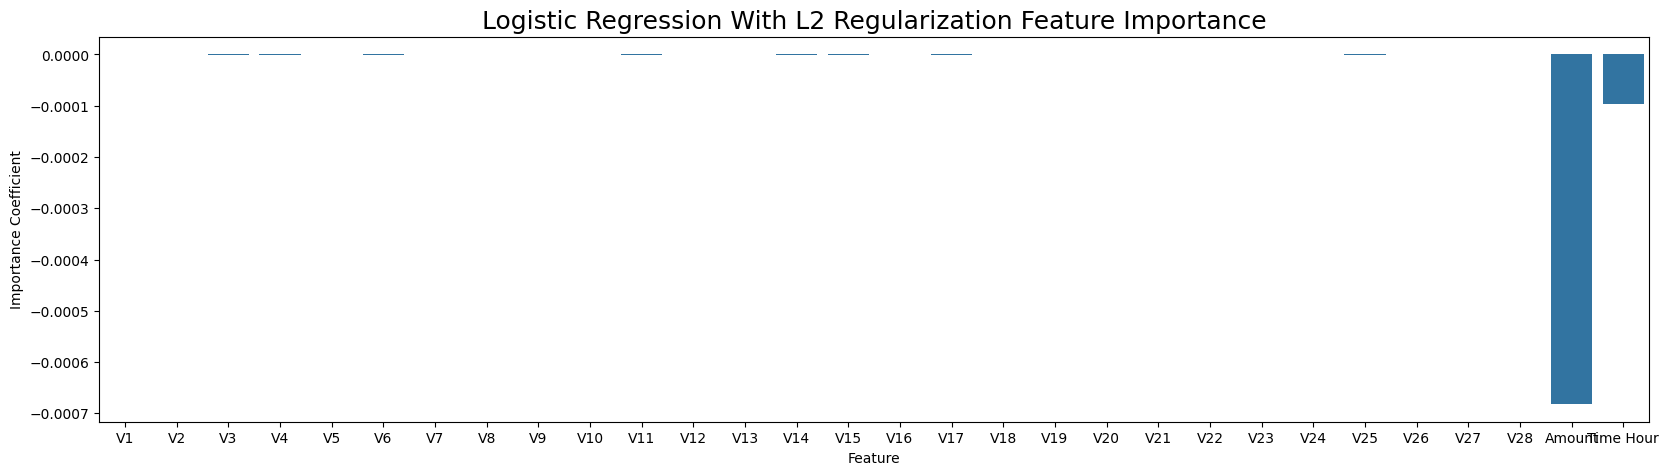

In [52]:
# plotting the coefficinet values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Importance Coefficient',data=coefficients)
plt.title("Logistic Regression With L2 Regularization Feature Importance", fontsize=18)

plt.show()

Hence it implies that V4, V5, V11 has +ve importancw whereas V10, V12, V14 seems to have -ve impact on the predictions

# Model building with Balancing Classes

### Perform class balancing with:
* Random Oversampling
* SMOTE
* ADASYN

# Random Oversampler

Random oversampling is a technique that involves randomly selecting examples from the minority class and adding them to the training dataset with replacement. This method can help balance the class distribution in the dataset, but it may also lead to overfitting since it artificially increases the size of the training dataset.y classes.

### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a statistical technique for increasing the number of cases in a dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This method creates synthetic data based on the feature space similarities between existing minority instances. To create a synthetic instance, SMOTE finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculates linear interpolations to produce a new minority instance in the neighborhood.

### ADASYN (Adaptive Synthetic)

ADASYN is an algorithm that generates synthetic data, and its main advantages are that it doesn't copy the same minority data and generates more data for "harder to learn" examples. ADASYN uses a density distribution to adaptively select the number of synthetic samples for each minority class sample, making it more suitable for imbalanced datasets with different densities of minority classes.

<span style="color:blue">
Oversampling with ramdomOverSampler with StratifiedKfold Cross Validation

</span>


# We will use Random Oversampling Method to handle the class imbalance

In [61]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 11.1 MB/s eta 0:00:00


In [62]:
# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Initializing Stratified KFold with 5 splits and no random state
skf = StratifiedKFold(n_splits=5, random_state=None)

# Looping through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Splitting the data into training and testing sets
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Initializing RandomOverSampler with a sampling strategy of 0.5
    ROS = RandomOverSampler(sampling_strategy=0.5) ## remember to change the value to  with full data set

    # Fitting and resampling the data
    X_over, y_over = ROS.fit_resample(X_train, y_train)

# Converting the resampled data into a DataFrame
X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.5
Max auc_roc for L2: 0.5
Parameters for L1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

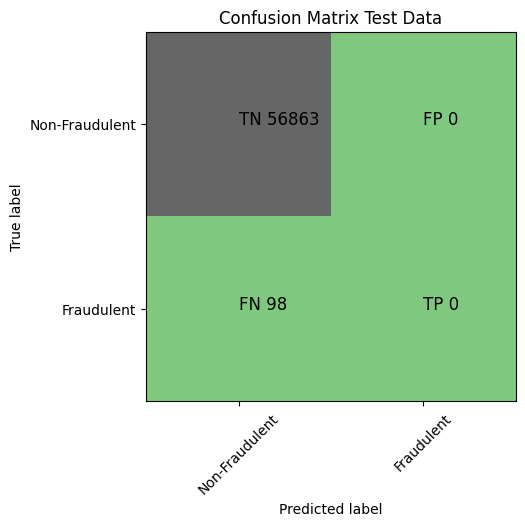

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization: 0.9982795245869981
Confusion Matrix


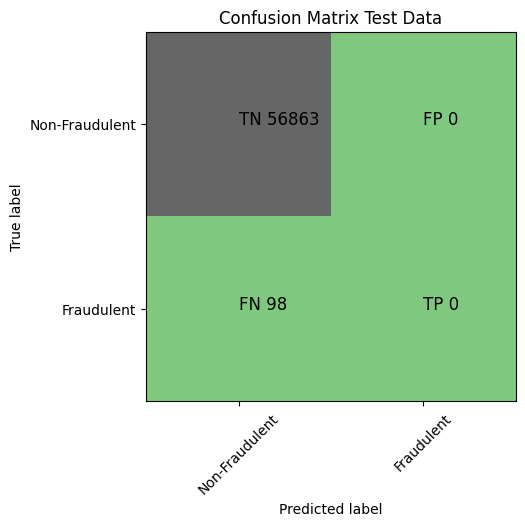

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 ROC Value: 0.5
L2 Threshold: inf
ROC for the test dataset: 50.0%


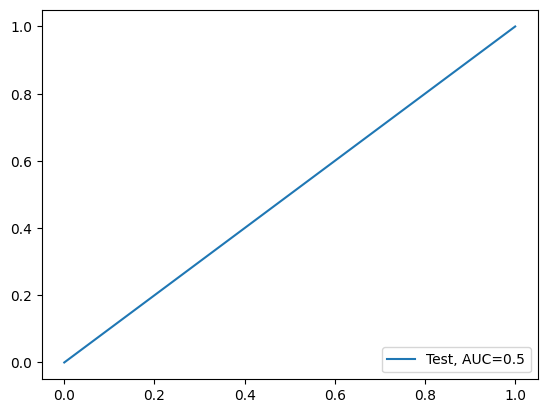

L1 ROC Value: 0.5
L1 Threshold: inf
ROC for the test dataset: 50.0%


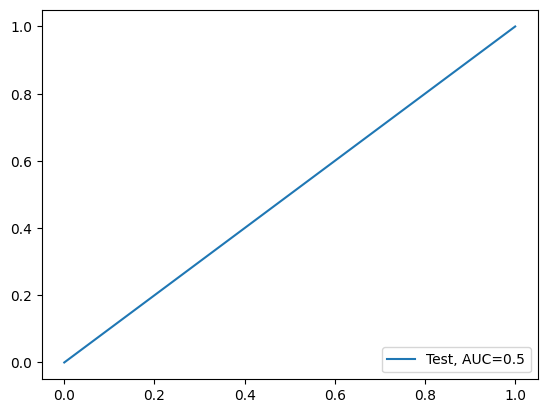

Time Taken by Model: --- 122.51950860023499 seconds ---
------------------------------------------------------------
KNN Model
Model score: 0.9980688541282632
Confusion Matrix:


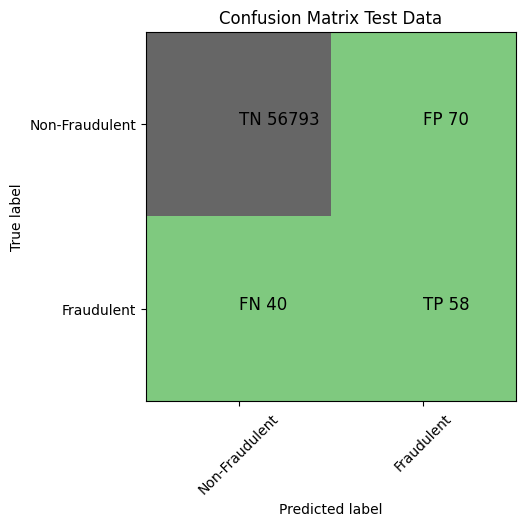

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset: 80.6%


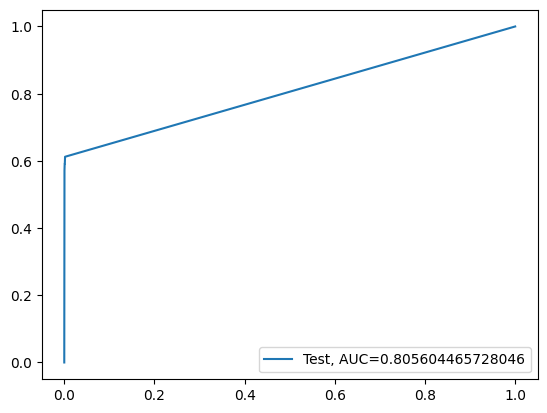

Time Taken by Model: --- 256.1500127315521 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9991222064219378
Confusion Matrix:


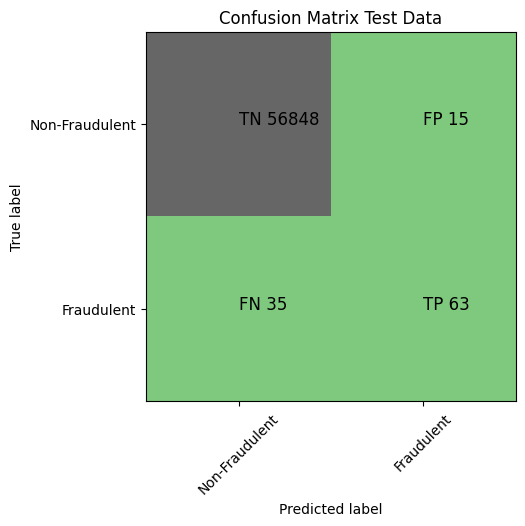

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.64      0.72        98

    accuracy                           1.00     56961
   macro avg       0.90      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.821296675468105
Tree threshold: 1.0
ROC for the test dataset: 82.1%


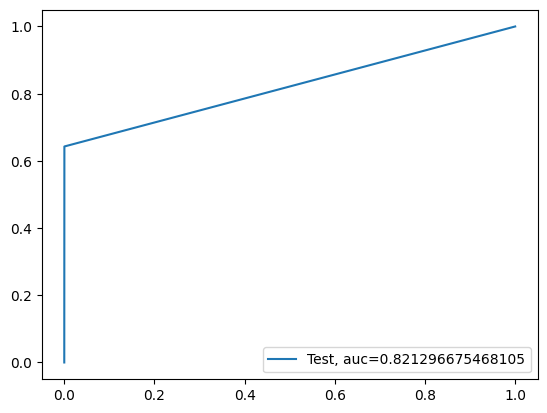

entropy score: 0.9991573181650603
Confusion Matrix:


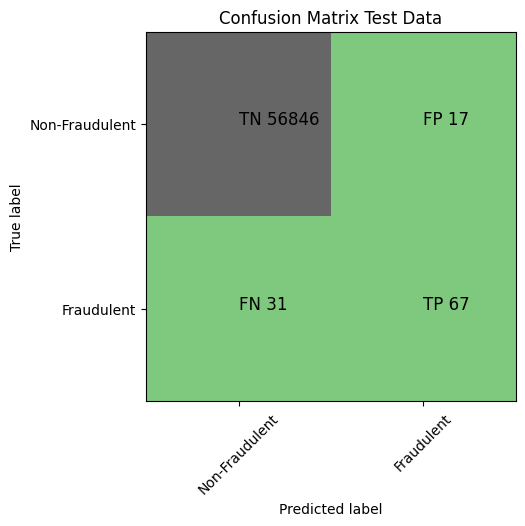

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.841687252605349
Tree threshold: 1.0
ROC for the test dataset: 84.2%


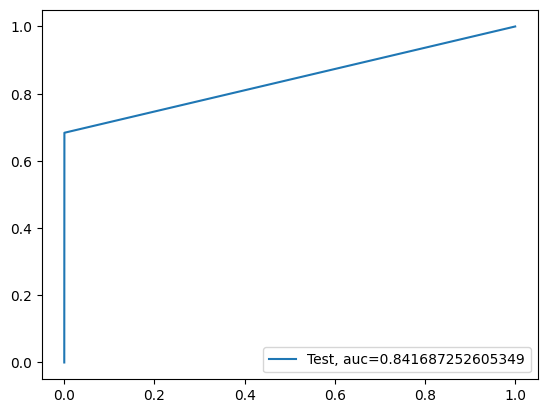

Time Taken by Model: 26.5636944770813 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix:


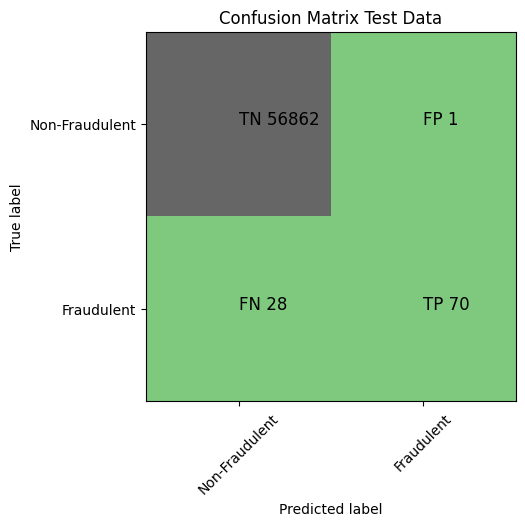

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9403327797890167
Random Forest threshold: 0.02
ROC for the test dataset: 94.0%


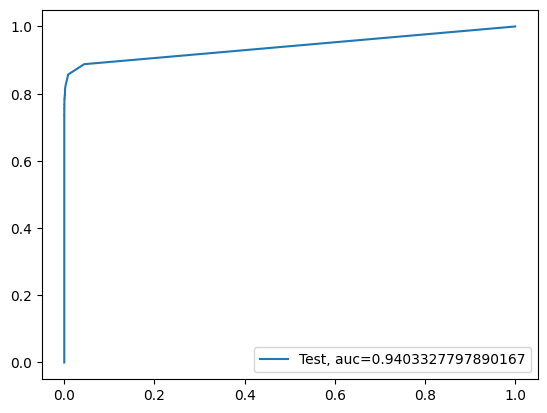

Time Taken by Model: --- 182.6661078929901 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999490879724724
Confusion Matrix:


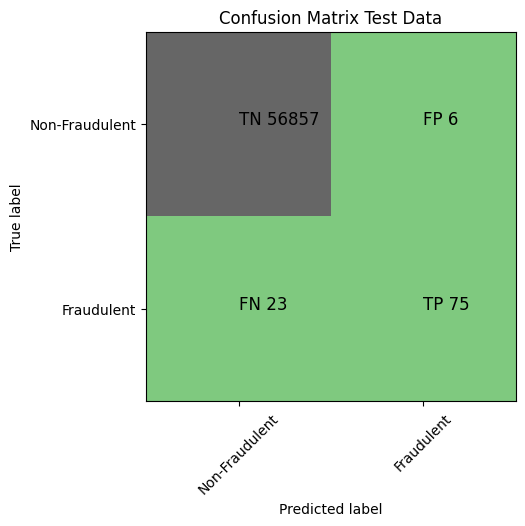

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9825065580107146
XGBoost threshold: 2.4874805603758432e-05
ROC for the test dataset: 98.3%


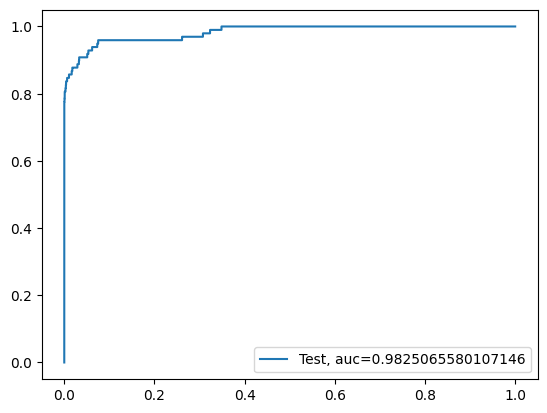

Time Taken by Model: 7.980218410491943 seconds
------------------------------------------------------------


In [63]:
Data_Imbalance_Handling ="Random Oversampling with stratifiedKFold CV"

# Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
# print("Time Taken by Model: %s seconds" % (time.time() - start_time))
# print('-' * 60)


In [64]:
# checking the df_result dataframe which contains consolidated results of all the runs
# Remove duplicates based on specific columns
df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression With L2 Regularization,0.998122,0.582691,0.046948
1,Repeated KFold Cross Validation,Logistic Regression With L1 Regularization,0.998841,0.842307,0.046948
2,Repeated KFold Cross Validation,KNN,0.999087,0.850228,0.200000
3,Repeated KFold Cross Validation,Tree Model with gini Criteria,0.999034,0.864257,1.000000
4,Repeated KFold Cross Validation,Tree Model with entropy Criteria,0.999140,0.845654,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999333,0.946635,0.010000
6,Repeated KFold Cross Validation,XGBoost,0.999421,0.979103,0.000073
7,Repeated KFold Cross Validation,SVM,0.997490,0.713435,0.001722
8,StratifiedKFold Cross Validation,Logistic Regression With L2 Regularization,0.998280,0.611162,0.021087
9,StratifiedKFold Cross Validation,Logistic Regression With L1 Regularization,0.998754,0.889076,0.021087


### Results for Random Oversampling with StratifiedKFold Tecnhique:

Looking at the accuracy and ROC value we have XGBoost which has provided best results for random Oversampling and StratifiedKFold Tecnhique.

# Oversampling with SMOTE Oversampling.

#### We will use SMOTE Oversampling method to handle the class imbalance

In [65]:
# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
import pandas as pd

# Initializing Stratified KFold with 5 splits and no random state
skf = StratifiedKFold(n_splits=5, random_state=None)

# Looping through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Splitting the data into training and testing sets
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Initializing SMOTE
    SMOTE = over_sampling.SMOTE(random_state=0)

    # Fitting and resampling the data
    X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

# Converting the resampled data into a DataFrame
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.5
Max auc_roc for L2: 0.5
Parameters for L1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

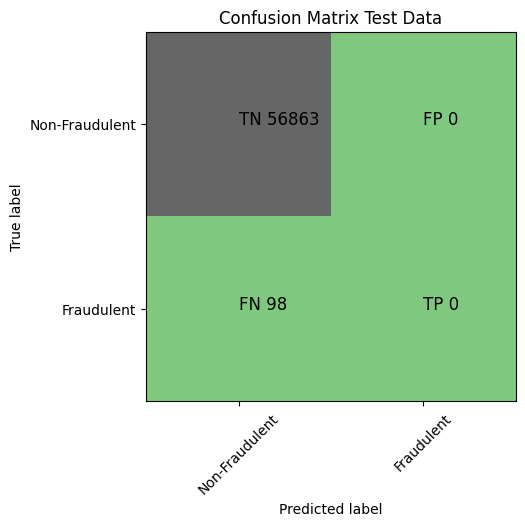

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization: 0.9982795245869981
Confusion Matrix


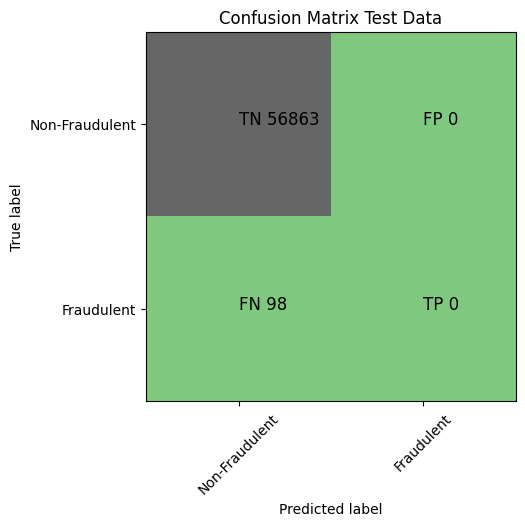

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 ROC Value: 0.5
L2 Threshold: inf
ROC for the test dataset: 50.0%


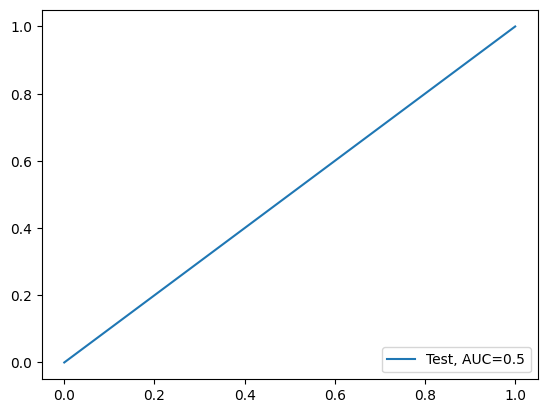

L1 ROC Value: 0.5
L1 Threshold: inf
ROC for the test dataset: 50.0%


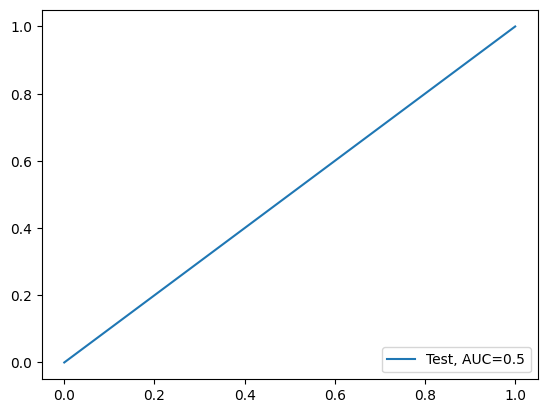

Time Taken by Model: --- 164.92453384399414 seconds ---
------------------------------------------------------------
KNN Model
Model score: 0.9946805709169432
Confusion Matrix:


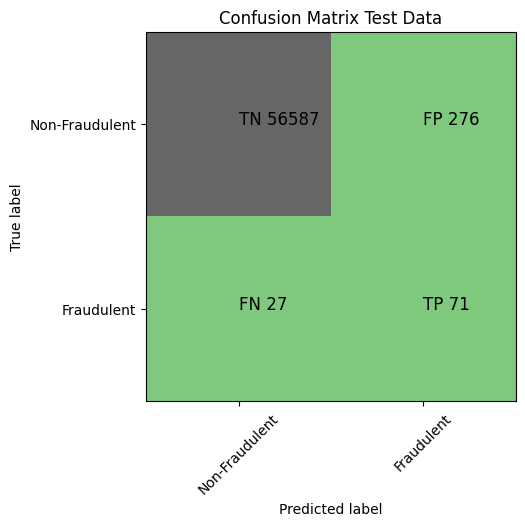

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset: 86.0%


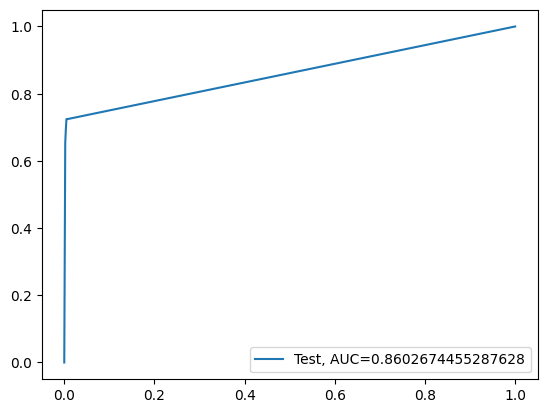

Time Taken by Model: --- 335.73555612564087 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix:


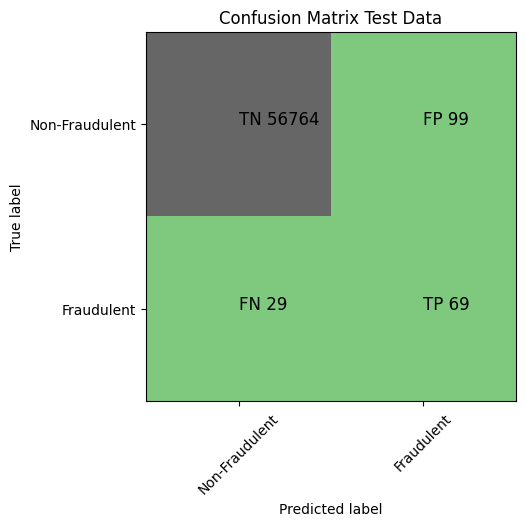

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset: 85.1%


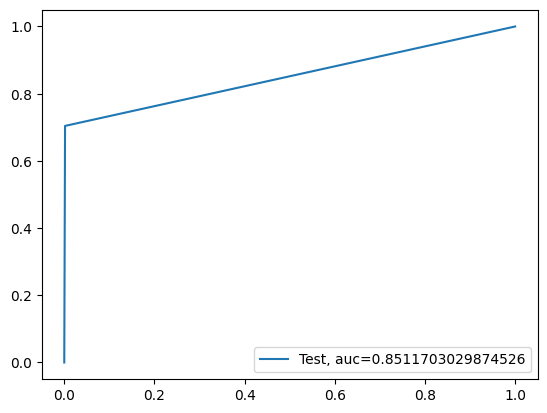

entropy score: 0.9969803900914661
Confusion Matrix:


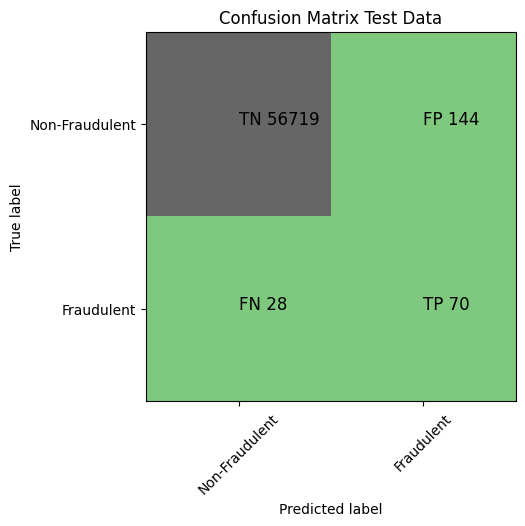

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset: 85.6%


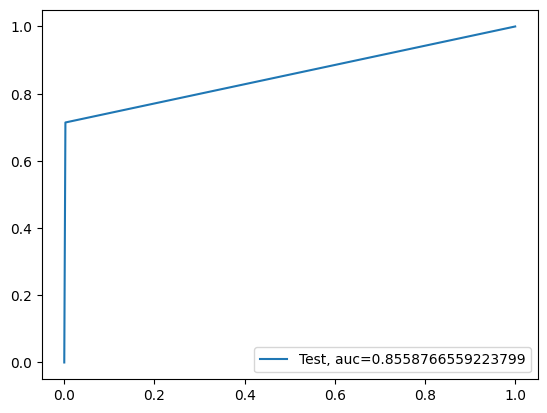

Time Taken by Model: 89.46497964859009 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix:


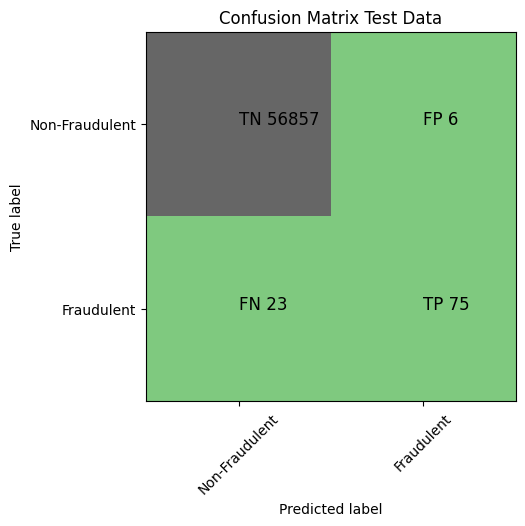

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset: 96.1%


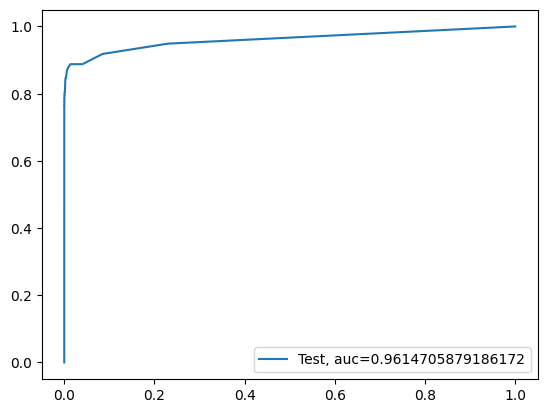

Time Taken by Model: --- 424.7923891544342 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix:


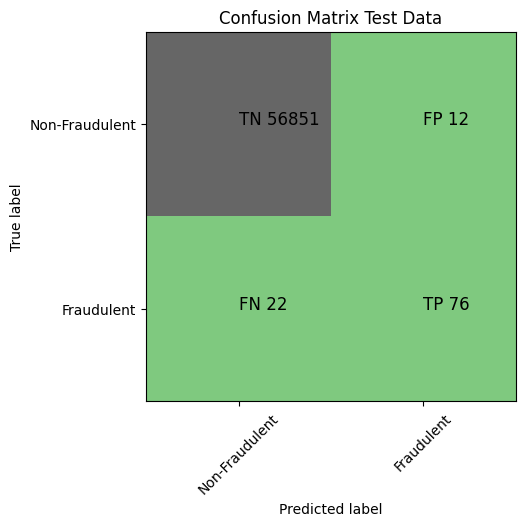

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset: 97.0%


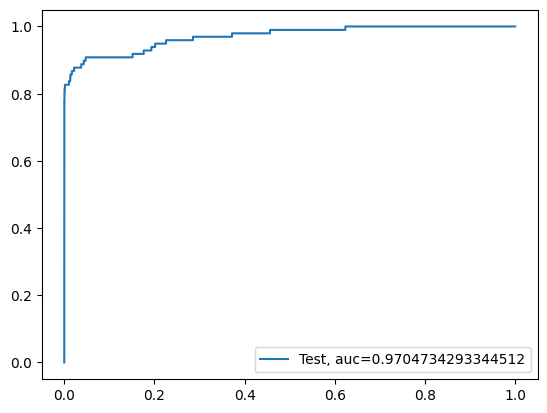

Time Taken by Model: 7.600730657577515 seconds
------------------------------------------------------------


In [66]:
Data_Imbalance_Handling ="SMOTE Oversampling with stratifiedKFold CV"

# Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
# print("Time Taken by Model: %s seconds" % (time.time() - start_time))
# print('-' * 60)


In [67]:
# checking the df_result dataframe which contains consolidated results of all the runs
# Remove duplicates based on specific columns
df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression With L2 Regularization,0.998122,0.582691,0.046948
1,Repeated KFold Cross Validation,Logistic Regression With L1 Regularization,0.998841,0.842307,0.046948
2,Repeated KFold Cross Validation,KNN,0.999087,0.850228,0.200000
3,Repeated KFold Cross Validation,Tree Model with gini Criteria,0.999034,0.864257,1.000000
4,Repeated KFold Cross Validation,Tree Model with entropy Criteria,0.999140,0.845654,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999333,0.946635,0.010000
6,Repeated KFold Cross Validation,XGBoost,0.999421,0.979103,0.000073
7,Repeated KFold Cross Validation,SVM,0.997490,0.713435,0.001722
8,StratifiedKFold Cross Validation,Logistic Regression With L2 Regularization,0.998280,0.611162,0.021087
9,StratifiedKFold Cross Validation,Logistic Regression With L1 Regularization,0.998754,0.889076,0.021087


### Results for SMOTE Oversampling with StratifiedKFold Tecnhique:

Looking at the accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling and StratifiedKFold Tecnhique.

# Oversampling with ADASYN Oversampling.


#### We will use SADASYN Oversampling method to handle the class imbalance


In [68]:
# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

# Initializing Stratified KFold with 5 splits and no random state
skf = StratifiedKFold(n_splits=5, random_state=None)

# Looping through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Splitting the data into training and testing sets
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Initializing SMOTE
    ADASYN = over_sampling.ADASYN(random_state=0)

    # Fitting and resampling the data
    X_train_ADASYN, y_train_ADASYN = SMOTE.fit_resample(X_train, y_train)

# Converting the resampled data into a DataFrame
X_train_Smote = pd.DataFrame(data=X_train_ADASYN, columns=cols)


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.5
Max auc_roc for L2: 0.5
Parameters for L1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

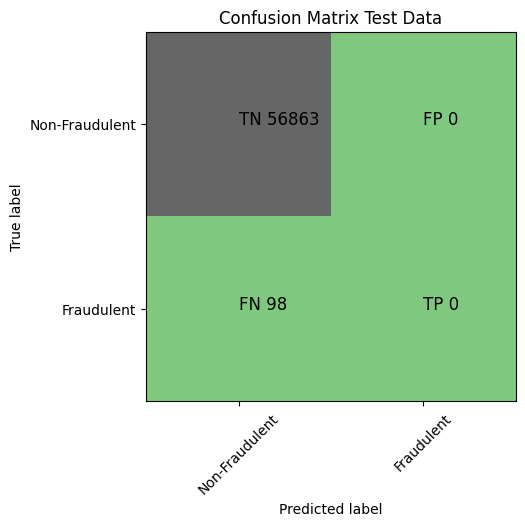

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L1 regularization: 0.9982795245869981
Confusion Matrix


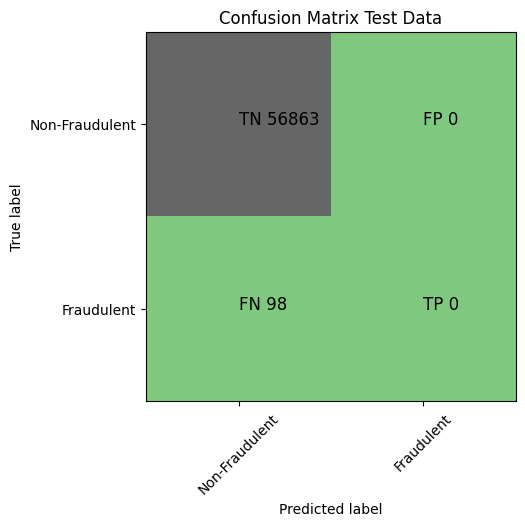

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

L2 ROC Value: 0.5
L2 Threshold: inf
ROC for the test dataset: 50.0%


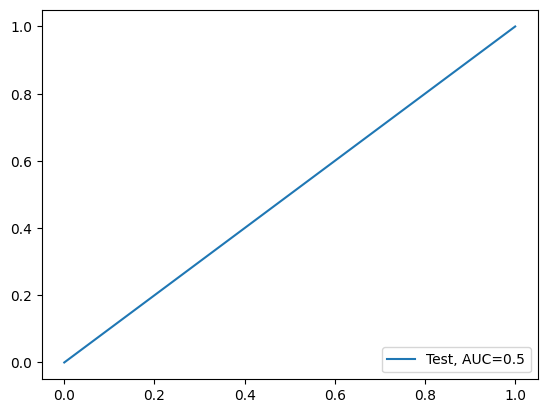

L1 ROC Value: 0.5
L1 Threshold: inf
ROC for the test dataset: 50.0%


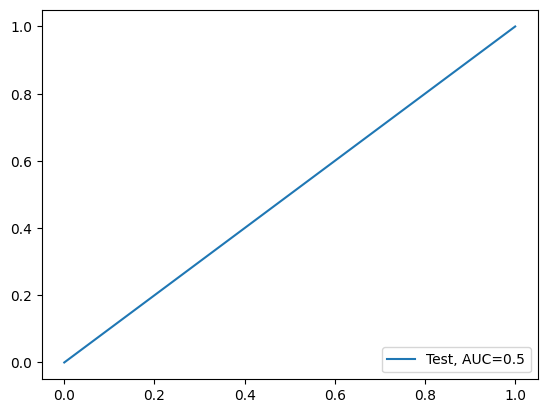

Time Taken by Model: --- 166.41522598266602 seconds ---
------------------------------------------------------------
KNN Model
Model score: 0.9946805709169432
Confusion Matrix:


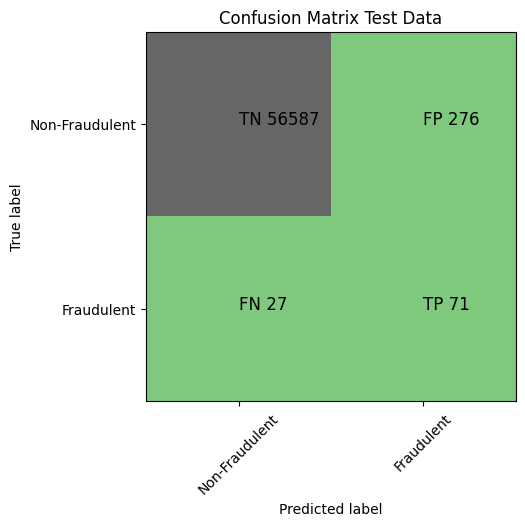

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset: 86.0%


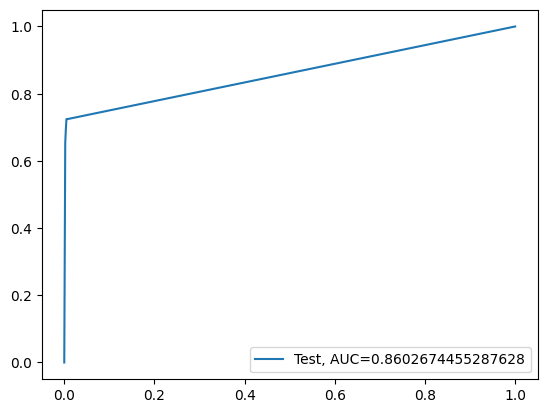

Time Taken by Model: --- 326.2730803489685 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix:


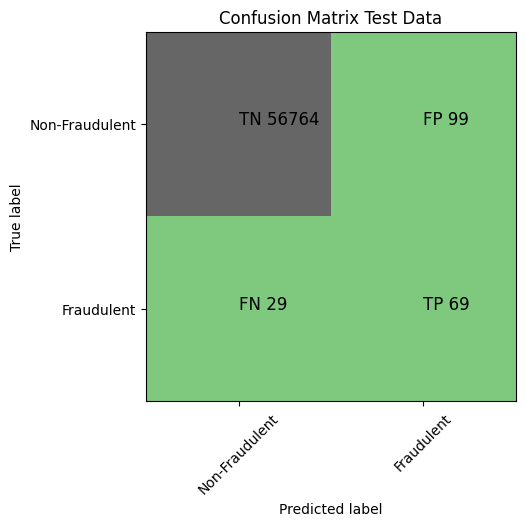

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset: 85.1%


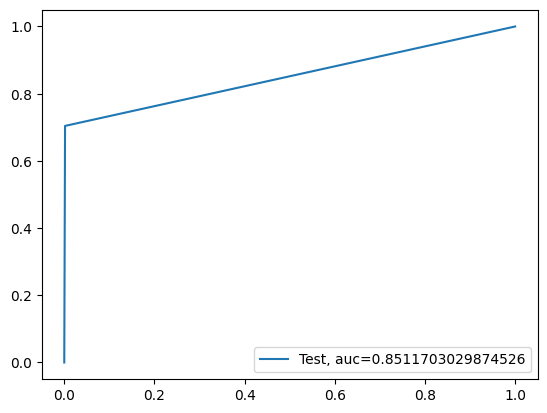

entropy score: 0.9969803900914661
Confusion Matrix:


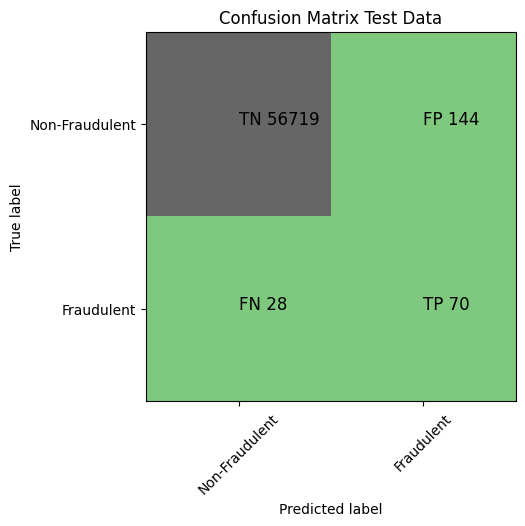

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset: 85.6%


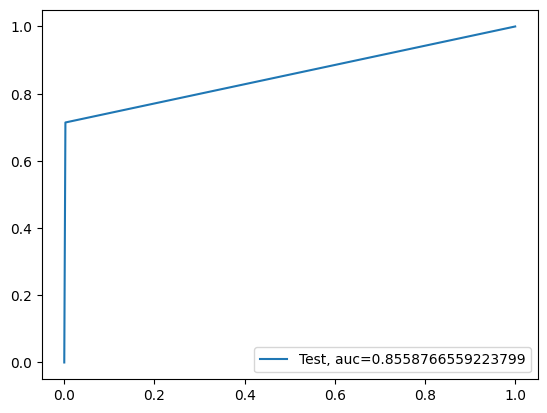

Time Taken by Model: 84.07874155044556 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix:


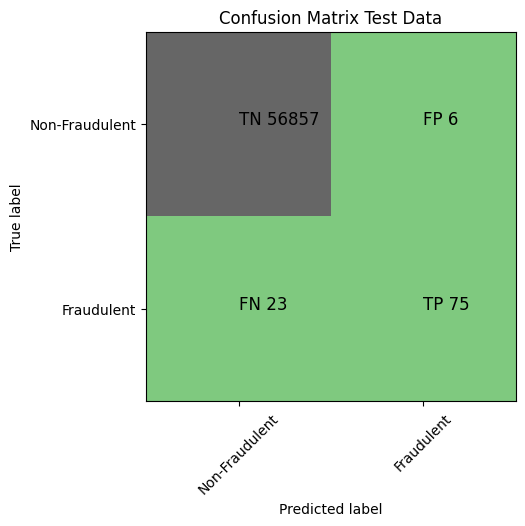

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset: 96.1%


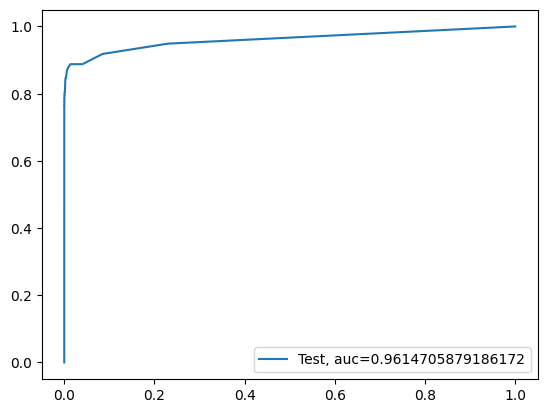

Time Taken by Model: --- 424.3216359615326 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix:


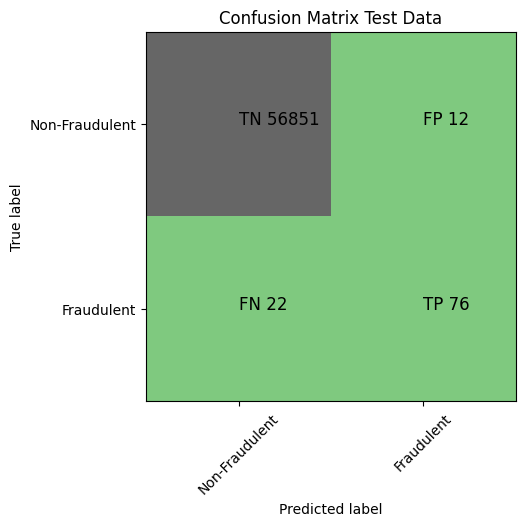

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset: 97.0%


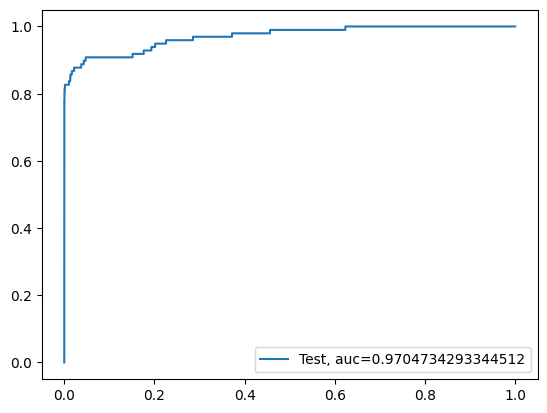

Time Taken by Model: 6.519957780838013 seconds
------------------------------------------------------------


In [69]:
Data_Imbalance_Handling ="ADASYN Oversampling with stratifiedKFold CV"

# Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-' * 60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 60)

# # Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
# print("Time Taken by Model: %s seconds" % (time.time() - start_time))
# print('-' * 60)


In [70]:
# checking the df_result dataframe which contains consolidated results of all the runs
# Remove duplicates based on specific columns
df_Results.drop_duplicates(subset=['Methodology', 'Model'], inplace=True)
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression With L2 Regularization,0.998122,0.582691,0.046948
1,Repeated KFold Cross Validation,Logistic Regression With L1 Regularization,0.998841,0.842307,0.046948
2,Repeated KFold Cross Validation,KNN,0.999087,0.850228,0.200000
3,Repeated KFold Cross Validation,Tree Model with gini Criteria,0.999034,0.864257,1.000000
4,Repeated KFold Cross Validation,Tree Model with entropy Criteria,0.999140,0.845654,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999333,0.946635,0.010000
6,Repeated KFold Cross Validation,XGBoost,0.999421,0.979103,0.000073
7,Repeated KFold Cross Validation,SVM,0.997490,0.713435,0.001722
8,StratifiedKFold Cross Validation,Logistic Regression With L2 Regularization,0.998280,0.611162,0.021087
9,StratifiedKFold Cross Validation,Logistic Regression With L1 Regularization,0.998754,0.889076,0.021087


### Results for ADASYN Oversampling with StratifiedKFold Tecnhique:

Looking at the accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling and StratifiedKFold Tecnhique.

# Oversampling conlusion after running the models om Oversampled data:
Looking at above results it seems XGBoost model with random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversmapling techniques. So we will try to tune the hyperparameters of this model to get best resutls.

# Hypderparameter tuning

## HPT- XGBoost Regression

In [74]:
# Import required libraries
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Define the hyperparameter space for the XGBoost classifier
param_test = {
    'max_depth': range(3, 10, 2),          # max_depth: max depth of the trees
    'min_child_weight': range(1, 6, 2),    # min_child_weight: minimum sum of instance weight(hessian) needed in a child
    'n_estimators': range(60, 130, 10),    # n_estimators: number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],      # learning_rate: step size shrinkage used in update to prevent overfitting
    'gamma': [i / 10.0 for i in range(0, 5)],            # gamma: minimum loss reduction required to make a further partition on a leaf node
    'subsample': [i / 10.0 for i in range(7, 10)],       # subsample: subsample ratio of the training instances
    'colsample_bytree': [i / 10.0 for i in range(7, 10)]  # colsample_bytree: subsample ratio of columns when constructing each tree
}

# gsearch1 = RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                         colsample_bynode=1, max_delta_step=0,
#                         missing=None, n_jobs=-1,
#                         nthread=None, objective='binary:logistic', random_state=42,
#                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#                         silent=None, verbosity=1),
#                         param_distributions=param_test, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)

gsearch1 = RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, max_delta_step=0,
                        missing=None, n_jobs=-1,
                        nthread=None, objective='binary:logistic', random_state=42,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                        silent=None, verbosity=1),
                        param_distributions=param_test, n_iter=5, scoring='roc_auc', n_jobs=1, cv=5)


# Fit the model to the data
gsearch1.fit(X_over, y_over)

# Get the results of the cross-validation and the best hyperparameters
gsearch1.cv_results_,gsearch1.best_params_,gsearch1.best_score_


({'mean_fit_time': array([3.60289273, 2.0368228 , 3.71537476, 3.5928782 , 3.56180282]),
  'std_fit_time': array([0.78212189, 0.06178992, 1.31779278, 0.04769476, 1.24185942]),
  'mean_score_time': array([0.01184931, 0.01018558, 0.01048331, 0.01005931, 0.01016188]),
  'std_score_time': array([0.00281727, 0.00017932, 0.00084086, 0.00031095, 0.00022797]),
  'param_subsample': masked_array(data=[0.9, 0.9, 0.8, 0.9, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[80, 70, 80, 110, 120],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 1, 1, 1, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[5, 3, 7, 7, 3],
               mask=[False, False, False, False, False],
     

Please note that the hyperparameters found above using RandomSearchCV and the hyperparameters used below in creating the final model might be different the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [75]:
# creating XGboost model with selected hyperparamenters
from xgboost import XGBClassifier

# Initialize XGBoost classifier with specific hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                    learning_rate=0.125, max_delta_step=0, max_depth=7,
                    min_child_weight=5, missing=0, n_estimators=60, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=None, subsample=0.8, verbosity=1)


# Fit the model on the dataset
clf.fit(X_over, y_over)

# Calculate accuracy score
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Get probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}".format(XGB_roc_value))

# Calculate threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993328768806727
XGboost roc_value: 0.9814878187351124
XGBoost threshold: 0.013958223164081573


# Print the important features of the best model to understand the dataset

In [76]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =',imp_var.index(np.sort(clf.feature_importances_)[-1]) + 1)
print('2Top var =',imp_var.index(np.sort(clf.feature_importances_)[-2]) + 1)
print('3Top var =',imp_var.index(np.sort(clf.feature_importances_)[-3]) + 1)

Top var = 10
2Top var = 14
3Top var = 12


In [77]:
#Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value:", format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold:", format(threshold))


XGBoost roc_value: 0.9814878187351124
XGBoost threshold: 0.013958223164081573


# CONCLUSION

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices :

**XGboost roc_value: 0.9814878187351124**

**XGBoost threshold: 0.013958223164081573**

